In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.cm as cm
from matplotlib import colors
import seaborn as sns
import RELACS as rel
import pymc3 as pm
sns.set_style("white")
sns.set_context("paper")
%load_ext rpy2.ipython
%matplotlib inline

/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# BINARIZE BAM FILES 
### for merged replicates

In [8]:
%%bash

# binarize mESC_DMSO_both_replicates together for learning the model
java -mx4000M -jar /home/ferrari/anaconda3/envs/Chrom-Seg/share/chromhmm-1.15-0/ChromHMM.jar BinarizeBam \
../INPUT_DATA/mm10.txt /home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_mESC/filtered_bam/ \
../INPUT_DATA/mESC_cellmarkfiletable_DMSO.tsv ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/merged_reps_DMSO

Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/merged_reps/mESC_1_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/merged_reps/mESC_2_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/merged_reps/mESC_X_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/merged_reps/mESC_3_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/merged_reps/mESC_4_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/merged_reps/mESC_5_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/merged_reps/mESC_6_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/merged_reps/mESC_7_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/merged_reps/mESC_10_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/merged_reps/mESC_8_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/merged_reps/mESC_

In [36]:
%%bash

# binarize mESC_DMSO_both_replicates together for learning the model
java -mx4000M -jar /home/ferrari/anaconda3/envs/Chrom-Seg/share/chromhmm-1.15-0/ChromHMM.jar BinarizeBam \
../INPUT_DATA/mm10.txt /home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_mESC/filtered_bam/ \
../INPUT_DATA/mESC_cellmarkfiletable_EPZ.tsv ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/merged_reps_EPZ

Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/merged_reps_EPZ/mESC_1_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/merged_reps_EPZ/mESC_2_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/merged_reps_EPZ/mESC_X_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/merged_reps_EPZ/mESC_3_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/merged_reps_EPZ/mESC_4_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/merged_reps_EPZ/mESC_5_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/merged_reps_EPZ/mESC_6_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/merged_reps_EPZ/mESC_7_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/merged_reps_EPZ/mESC_10_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/merged_reps_EPZ/mESC_8_binary.txt
Writing to file ../INTERMEDIATE_FILES/o

In [7]:
%%bash

# binarize NPC48h_DMSO_both_replicates together for learning the model
java -mx4000M -jar /home/ferrari/anaconda3/envs/Chrom-Seg/share/chromhmm-1.15-0/ChromHMM.jar BinarizeBam \
../INPUT_DATA/mm10.txt /home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_iNPC/filtered_bam/ \
../INPUT_DATA/NPC48h_cellmarkfiletable_DMSO.tsv ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/merged_reps_DMSO

Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/merged_reps//iNPC_1_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/merged_reps//iNPC_2_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/merged_reps//iNPC_X_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/merged_reps//iNPC_3_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/merged_reps//iNPC_4_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/merged_reps//iNPC_5_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/merged_reps//iNPC_6_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/merged_reps//iNPC_7_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/merged_reps//iNPC_10_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/merged_reps//iNPC_8_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_Bina

In [37]:
%%bash

# binarize NPC48h_DMSO_both_replicates together for learning the model
java -mx4000M -jar /home/ferrari/anaconda3/envs/Chrom-Seg/share/chromhmm-1.15-0/ChromHMM.jar BinarizeBam \
../INPUT_DATA/mm10.txt /home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_iNPC/filtered_bam/ \
../INPUT_DATA/NPC48h_cellmarkfiletable_EPZ.tsv ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/merged_reps_EPZ

Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/merged_reps_EPZ/iNPC_1_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/merged_reps_EPZ/iNPC_2_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/merged_reps_EPZ/iNPC_X_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/merged_reps_EPZ/iNPC_3_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/merged_reps_EPZ/iNPC_4_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/merged_reps_EPZ/iNPC_5_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/merged_reps_EPZ/iNPC_6_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/merged_reps_EPZ/iNPC_7_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/merged_reps_EPZ/iNPC_10_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/merged_reps_EPZ/iNPC_8_binary.txt
Writing to file ../

### for each individual replicate separately

#### mESC

In [9]:
%%bash
# binarize mESC_DMSO_rep1
java -mx4000M -jar /home/ferrari/anaconda3/envs/Chrom-Seg/share/chromhmm-1.15-0/ChromHMM.jar BinarizeBam \
../INPUT_DATA/mm10.txt /home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_mESC/filtered_bam/ \
../INPUT_DATA/mESC_DMSO_rep1_cellmarkfiletable.tsv ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_DMSO_rep1

Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_DMSO_rep1/mESC_1_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_DMSO_rep1/mESC_2_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_DMSO_rep1/mESC_X_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_DMSO_rep1/mESC_3_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_DMSO_rep1/mESC_4_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_DMSO_rep1/mESC_5_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_DMSO_rep1/mESC_6_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_DMSO_rep1/mESC_7_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_DMSO_rep1/mESC_10_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_DMSO_rep1/mESC_8_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_Bina

In [10]:
%%bash
# binarize mESC_DMSO_rep2
java -mx4000M -jar /home/ferrari/anaconda3/envs/Chrom-Seg/share/chromhmm-1.15-0/ChromHMM.jar BinarizeBam \
../INPUT_DATA/mm10.txt /home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_mESC/filtered_bam/ \
../INPUT_DATA/mESC_DMSO_rep2_cellmarkfiletable.tsv ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_DMSO_rep2

Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_DMSO_rep2/mESC_1_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_DMSO_rep2/mESC_2_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_DMSO_rep2/mESC_X_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_DMSO_rep2/mESC_3_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_DMSO_rep2/mESC_4_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_DMSO_rep2/mESC_5_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_DMSO_rep2/mESC_6_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_DMSO_rep2/mESC_7_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_DMSO_rep2/mESC_10_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_DMSO_rep2/mESC_8_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_Bina

In [11]:
%%bash
# binarize mESC_EPZ_rep1
java -mx4000M -jar /home/ferrari/anaconda3/envs/Chrom-Seg/share/chromhmm-1.15-0/ChromHMM.jar BinarizeBam \
../INPUT_DATA/mm10.txt /home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_mESC/filtered_bam/ \
../INPUT_DATA/mESC_EPZ_rep1_cellmarkfiletable.tsv ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_EPZ_rep1

Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_EPZ_rep1/mESC_1_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_EPZ_rep1/mESC_2_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_EPZ_rep1/mESC_X_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_EPZ_rep1/mESC_3_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_EPZ_rep1/mESC_4_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_EPZ_rep1/mESC_5_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_EPZ_rep1/mESC_6_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_EPZ_rep1/mESC_7_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_EPZ_rep1/mESC_10_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_EPZ_rep1/mESC_8_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mE

In [12]:
%%bash
# binarize mESC_EPZ_rep2
java -mx4000M -jar /home/ferrari/anaconda3/envs/Chrom-Seg/share/chromhmm-1.15-0/ChromHMM.jar BinarizeBam \
../INPUT_DATA/mm10.txt /home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_mESC/filtered_bam/ \
../INPUT_DATA/mESC_EPZ_rep2_cellmarkfiletable.tsv ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_EPZ_rep2

Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_EPZ_rep2/mESC_1_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_EPZ_rep2/mESC_2_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_EPZ_rep2/mESC_X_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_EPZ_rep2/mESC_3_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_EPZ_rep2/mESC_4_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_EPZ_rep2/mESC_5_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_EPZ_rep2/mESC_6_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_EPZ_rep2/mESC_7_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_EPZ_rep2/mESC_10_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_EPZ_rep2/mESC_8_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_mE

#### NPC48h

In [13]:
%%bash
# binarize NPC48h_DMSO_rep1
java -mx4000M -jar /home/ferrari/anaconda3/envs/Chrom-Seg/share/chromhmm-1.15-0/ChromHMM.jar BinarizeBam \
../INPUT_DATA/mm10.txt /home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_iNPC/filtered_bam/ \
../INPUT_DATA/NPC48h_DMSO_rep1_cellmarkfiletable.tsv ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_DMSO_rep1

Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_DMSO_rep1/iNPC_1_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_DMSO_rep1/iNPC_2_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_DMSO_rep1/iNPC_X_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_DMSO_rep1/iNPC_3_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_DMSO_rep1/iNPC_4_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_DMSO_rep1/iNPC_5_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_DMSO_rep1/iNPC_6_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_DMSO_rep1/iNPC_7_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_DMSO_rep1/iNPC_10_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_DMSO_rep1/iNPC_8_binary.txt
Writing t

In [14]:
%%bash
# binarize NPC48h_DMSO_rep2
java -mx4000M -jar /home/ferrari/anaconda3/envs/Chrom-Seg/share/chromhmm-1.15-0/ChromHMM.jar BinarizeBam \
../INPUT_DATA/mm10.txt /home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_iNPC/filtered_bam/ \
../INPUT_DATA/NPC48h_DMSO_rep2_cellmarkfiletable.tsv ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_DMSO_rep2

Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_DMSO_rep2/iNPC_1_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_DMSO_rep2/iNPC_2_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_DMSO_rep2/iNPC_X_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_DMSO_rep2/iNPC_3_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_DMSO_rep2/iNPC_4_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_DMSO_rep2/iNPC_5_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_DMSO_rep2/iNPC_6_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_DMSO_rep2/iNPC_7_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_DMSO_rep2/iNPC_10_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_DMSO_rep2/iNPC_8_binary.txt
Writing t

In [15]:
%%bash
# binarize NPC48h_EPZ_rep1
java -mx4000M -jar /home/ferrari/anaconda3/envs/Chrom-Seg/share/chromhmm-1.15-0/ChromHMM.jar BinarizeBam \
../INPUT_DATA/mm10.txt /home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_iNPC/filtered_bam/ \
../INPUT_DATA/NPC48h_EPZ_rep1_cellmarkfiletable.tsv ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_EPZ_rep1

Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_EPZ_rep1/iNPC_1_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_EPZ_rep1/iNPC_2_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_EPZ_rep1/iNPC_X_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_EPZ_rep1/iNPC_3_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_EPZ_rep1/iNPC_4_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_EPZ_rep1/iNPC_5_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_EPZ_rep1/iNPC_6_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_EPZ_rep1/iNPC_7_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_EPZ_rep1/iNPC_10_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_EPZ_rep1/iNPC_8_binary.txt
Writing to file ../

In [16]:
%%bash
# binarize NPC48h_EPZ_rep2
java -mx4000M -jar /home/ferrari/anaconda3/envs/Chrom-Seg/share/chromhmm-1.15-0/ChromHMM.jar BinarizeBam \
../INPUT_DATA/mm10.txt /home/ferrari/ferrari/PhD_project/reference_datasets/Ferrari_mESC-iNPC_DMSOvsEPZ_fullEpigenomes_MERGED/output_DNA-mapping_snakepipe_iNPC/filtered_bam/ \
../INPUT_DATA/NPC48h_EPZ_rep2_cellmarkfiletable.tsv ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_EPZ_rep2

Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_EPZ_rep2/iNPC_1_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_EPZ_rep2/iNPC_2_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_EPZ_rep2/iNPC_X_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_EPZ_rep2/iNPC_3_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_EPZ_rep2/iNPC_4_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_EPZ_rep2/iNPC_5_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_EPZ_rep2/iNPC_6_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_EPZ_rep2/iNPC_7_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_EPZ_rep2/iNPC_10_binary.txt
Writing to file ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_EPZ_rep2/iNPC_8_binary.txt
Writing to file ../

# LEARN MODEL 
### using merged_reps

#### mESC

In [17]:
%%bash

java -mx4000M -jar /home/ferrari/anaconda3/envs/Chrom-Seg/share/chromhmm-1.15-0/ChromHMM.jar LearnModel \
-p 15 ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/merged_reps_DMSO ../INTERMEDIATE_FILES/Model_15_States_mESC 15 mm10

Using 15 threads for Baum-Welch training
Writing to file ../INTERMEDIATE_FILES/Model_15_States_mESC/transitions_15.txt
Writing to file ../INTERMEDIATE_FILES/Model_15_States_mESC/emissions_15.txt
Writing to file ../INTERMEDIATE_FILES/Model_15_States_mESC/emissions_15.svg
Writing to file ../INTERMEDIATE_FILES/Model_15_States_mESC/emissions_15.png
Writing to file ../INTERMEDIATE_FILES/Model_15_States_mESC/transitions_15.png
Writing to file ../INTERMEDIATE_FILES/Model_15_States_mESC/transitions_15.svg
Writing to file ../INTERMEDIATE_FILES/Model_15_States_mESC/model_15.txt
 Iteration  Estimated Log Likelihood     Change    Total Time (secs)
         1             -12709593.314          -                  5.9
         2             -12090646.708 618946.606                  9.5
         3             -11912232.914 178413.794                 13.4
         4             -11782596.224 129636.690                 16.9
         5             -11690626.705  91969.518                 20.3
         6 

!["emissions_15"](../INTERMEDIATE_FILES/Model_15_States_mESC/emissions_15.png)

In [1]:
%%bash

mkdir ../INTERMEDIATE_FILES/Model_15_States_reoredered_mESC


In [2]:
reorder = {"1":"1",
           "2":"2",
           "3":"3",
           "4":"5",
           "5":"6",
           "6":"7",
           "7":"8",
           "8":"15",
           "9":"10",
           "10":"9",
           "11":"11",
           "12":"4",
           "13":"13",
           "14":"14",
           "15":"12",
           }

with open("../INTERMEDIATE_FILES/Model_15_States_reoredered_mESC/stateorderingfile_mESC.txt",'w') as out:
    for k in range(1,16):
        out.write("\t".join([str(k),reorder[str(k)]+"\n"]))
        

In [6]:
!cat ../INTERMEDIATE_FILES/Model_15_States_reoredered_mESC/stateorderingfile_mESC.txt

1	1
2	2
3	3
4	5
5	6
6	7
7	8
8	15
9	10
10	9
11	11
12	4
13	13
14	14
15	12


In [11]:
%%bash

### REORDER STATES

java -mx4000M -jar /home/ferrari/anaconda3/envs/Chrom-Seg/share/chromhmm-1.15-0/ChromHMM.jar Reorder \
-o ../INTERMEDIATE_FILES/Model_15_States_reoredered_mESC/stateorderingfile_mESC.txt \
../INTERMEDIATE_FILES/Model_15_States_mESC/model_15.txt \
../INTERMEDIATE_FILES/Model_15_States_reoredered_mESC/ 

Writing to file ../INTERMEDIATE_FILES/Model_15_States_reoredered_mESC//transitions_15.txt
Writing to file ../INTERMEDIATE_FILES/Model_15_States_reoredered_mESC//emissions_15.txt
Writing to file ../INTERMEDIATE_FILES/Model_15_States_reoredered_mESC//emissions_15.svg
Writing to file ../INTERMEDIATE_FILES/Model_15_States_reoredered_mESC//emissions_15.png
Writing to file ../INTERMEDIATE_FILES/Model_15_States_reoredered_mESC//transitions_15.png
Writing to file ../INTERMEDIATE_FILES/Model_15_States_reoredered_mESC//transitions_15.svg
Writing to file ../INTERMEDIATE_FILES/Model_15_States_reoredered_mESC//model_15.txt


!["emissions_15"](../INTERMEDIATE_FILES/Model_15_States_reoredered_mESC/emissions_15.png)

#### NPC48h 

In [18]:
%%bash

java -mx4000M -jar /home/ferrari/anaconda3/envs/Chrom-Seg/share/chromhmm-1.15-0/ChromHMM.jar LearnModel \
-p 15 ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/merged_reps_DMSO ../INTERMEDIATE_FILES/Model_15_States_NPC48h 15 mm10

Using 15 threads for Baum-Welch training
Writing to file ../INTERMEDIATE_FILES/Model_15_States_NPC48h/transitions_15.txt
Writing to file ../INTERMEDIATE_FILES/Model_15_States_NPC48h/emissions_15.txt
Writing to file ../INTERMEDIATE_FILES/Model_15_States_NPC48h/emissions_15.svg
Writing to file ../INTERMEDIATE_FILES/Model_15_States_NPC48h/emissions_15.png
Writing to file ../INTERMEDIATE_FILES/Model_15_States_NPC48h/transitions_15.png
Writing to file ../INTERMEDIATE_FILES/Model_15_States_NPC48h/transitions_15.svg
Writing to file ../INTERMEDIATE_FILES/Model_15_States_NPC48h/model_15.txt
 Iteration  Estimated Log Likelihood     Change    Total Time (secs)
         1             -10507542.845          -                  4.2
         2             -10127190.537 380352.307                  7.4
         3              -9965688.685 161501.852                 10.3
         4              -9832594.258 133094.428                 13.1
         5              -9733944.295  98649.962                 16

!["emissions_15"](../INTERMEDIATE_FILES/Model_15_States_NPC48h/emissions_15.png)

# MAKE SEGMENTATION

#### mESC

In [12]:
%%bash

java -mx4000M -jar /home/ferrari/anaconda3/envs/Chrom-Seg/share/chromhmm-1.15-0/ChromHMM.jar MakeSegmentation \
../INTERMEDIATE_FILES/Model_15_States_reoredered_mESC/model_15.txt ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/merged_reps_DMSO \
../INTERMEDIATE_FILES/MakeSegmentation_mESC/merged_reps_DMSO

Writing to file ../INTERMEDIATE_FILES/MakeSegmentation_mESC/merged_reps_DMSO/mESC_15_segments.bed


In [13]:
%%bash

java -mx4000M -jar /home/ferrari/anaconda3/envs/Chrom-Seg/share/chromhmm-1.15-0/ChromHMM.jar MakeSegmentation \
../INTERMEDIATE_FILES/Model_15_States_reoredered_mESC/model_15.txt ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/merged_reps_EPZ \
../INTERMEDIATE_FILES/MakeSegmentation_mESC/merged_reps_EPZ

Writing to file ../INTERMEDIATE_FILES/MakeSegmentation_mESC/merged_reps_EPZ/mESC_15_segments.bed


In [14]:
%%bash

java -mx4000M -jar /home/ferrari/anaconda3/envs/Chrom-Seg/share/chromhmm-1.15-0/ChromHMM.jar MakeSegmentation \
../INTERMEDIATE_FILES/Model_15_States_reoredered_mESC/model_15.txt ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_DMSO_rep1 \
../INTERMEDIATE_FILES/MakeSegmentation_mESC/mESC_DMSO_rep1

Writing to file ../INTERMEDIATE_FILES/MakeSegmentation_mESC/mESC_DMSO_rep1/mESC_15_segments.bed


In [15]:
%%bash

java -mx4000M -jar /home/ferrari/anaconda3/envs/Chrom-Seg/share/chromhmm-1.15-0/ChromHMM.jar MakeSegmentation \
../INTERMEDIATE_FILES/Model_15_States_reoredered_mESC/model_15.txt ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_DMSO_rep2 \
../INTERMEDIATE_FILES/MakeSegmentation_mESC/mESC_DMSO_rep2

Writing to file ../INTERMEDIATE_FILES/MakeSegmentation_mESC/mESC_DMSO_rep2/mESC_15_segments.bed


In [16]:
%%bash

java -mx4000M -jar /home/ferrari/anaconda3/envs/Chrom-Seg/share/chromhmm-1.15-0/ChromHMM.jar MakeSegmentation \
../INTERMEDIATE_FILES/Model_15_States_reoredered_mESC/model_15.txt ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_EPZ_rep1 \
../INTERMEDIATE_FILES/MakeSegmentation_mESC/mESC_EPZ_rep1

Writing to file ../INTERMEDIATE_FILES/MakeSegmentation_mESC/mESC_EPZ_rep1/mESC_15_segments.bed


In [17]:
%%bash

java -mx4000M -jar /home/ferrari/anaconda3/envs/Chrom-Seg/share/chromhmm-1.15-0/ChromHMM.jar MakeSegmentation \
../INTERMEDIATE_FILES/Model_15_States_reoredered_mESC/model_15.txt ../INTERMEDIATE_FILES/output_BinarizeBam_mESC/mESC_EPZ_rep2 \
../INTERMEDIATE_FILES/MakeSegmentation_mESC/mESC_EPZ_rep2

Writing to file ../INTERMEDIATE_FILES/MakeSegmentation_mESC/mESC_EPZ_rep2/mESC_15_segments.bed


#### NPC48h

In [28]:
%%bash

java -mx4000M -jar /home/ferrari/anaconda3/envs/Chrom-Seg/share/chromhmm-1.15-0/ChromHMM.jar MakeSegmentation \
../INTERMEDIATE_FILES/Model_15_States_NPC48h/model_15.txt ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/merged_reps_DMSO \
../INTERMEDIATE_FILES/MakeSegmentation_NPC48h/merged_reps_DMSO

Writing to file MakeSegmentation_NPC48h/merged_reps_DMSO/iNPC_15_segments.bed


In [39]:
%%bash

java -mx4000M -jar /home/ferrari/anaconda3/envs/Chrom-Seg/share/chromhmm-1.15-0/ChromHMM.jar MakeSegmentation \
../INTERMEDIATE_FILES/Model_15_States_NPC48h/model_15.txt ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/merged_reps_EPZ \
../INTERMEDIATE_FILES/MakeSegmentation_NPC48h/merged_reps_EPZ

Writing to file ../INTERMEDIATE_FILES/MakeSegmentation_NPC48h/merged_reps_EPZ/iNPC_15_segments.bed


In [40]:
%%bash

java -mx4000M -jar /home/ferrari/anaconda3/envs/Chrom-Seg/share/chromhmm-1.15-0/ChromHMM.jar MakeSegmentation \
../INTERMEDIATE_FILES/Model_15_States_NPC48h/model_15.txt ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_DMSO_rep1 \
../INTERMEDIATE_FILES/MakeSegmentation_NPC48h/NPC48h_DMSO_rep1

Writing to file ../INTERMEDIATE_FILES/MakeSegmentation_NPC48h/NPC48h_DMSO_rep1/iNPC_15_segments.bed


In [30]:
%%bash

java -mx4000M -jar /home/ferrari/anaconda3/envs/Chrom-Seg/share/chromhmm-1.15-0/ChromHMM.jar MakeSegmentation \
../INTERMEDIATE_FILES/Model_15_States_NPC48h/model_15.txt ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_DMSO_rep2 \
../INTERMEDIATE_FILES/MakeSegmentation_NPC48h/NPC48h_DMSO_rep2

Writing to file MakeSegmentation_NPC48h/NPC48h_DMSO_rep2/iNPC_15_segments.bed


In [31]:
%%bash

java -mx4000M -jar /home/ferrari/anaconda3/envs/Chrom-Seg/share/chromhmm-1.15-0/ChromHMM.jar MakeSegmentation \
../INTERMEDIATE_FILES/Model_15_States_NPC48h/model_15.txt ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_EPZ_rep1 \
../INTERMEDIATE_FILES/MakeSegmentation_NPC48h/NPC48h_EPZ_rep1

Writing to file MakeSegmentation_NPC48h/NPC48h_EPZ_rep1/iNPC_15_segments.bed


In [32]:
%%bash

java -mx4000M -jar /home/ferrari/anaconda3/envs/Chrom-Seg/share/chromhmm-1.15-0/ChromHMM.jar MakeSegmentation \
../INTERMEDIATE_FILES/Model_15_States_NPC48h/model_15.txt ../INTERMEDIATE_FILES/output_BinarizeBam_NPC48h/NPC48h_EPZ_rep2 \
../INTERMEDIATE_FILES/MakeSegmentation_NPC48h/NPC48h_EPZ_rep2

Writing to file MakeSegmentation_NPC48h/NPC48h_EPZ_rep2/iNPC_15_segments.bed


# CREATE FLATTENED BED FILE

In [18]:
%%bash

cat ../INTERMEDIATE_FILES/MakeSegmentation_NPC48h/NPC48h*/*.bed > ../INTERMEDIATE_FILES/cat_sorted_segmentations_NPC48h.bed
cat ../INTERMEDIATE_FILES/MakeSegmentation_mESC/mESC*/*.bed > ../INTERMEDIATE_FILES/cat_sorted_segmentations_mESC.bed

In [19]:
import pandas as pd
import numpy as np
import os

def flatten_bed(cat_sorted, out_file):
    seg1 = pd.read_csv(cat_sorted, sep="\t",header=None)
    seg1[0] = seg1[0].astype('str')
    
    out_bed = []

    for i in [str(j) for j in set(seg1[0])]:
        seg_chr = seg1.loc[seg1[0] == i]
        all_coords = sorted(list(set(list(seg_chr[1])+list(seg_chr[2]))))
        for j in range(len(all_coords)-1):
            line = "\t".join([str(i),str(all_coords[j]),str(all_coords[j+1])+"\n"])
            out_bed.append(line)
    outdir = "/".join(os.path.abspath(cat_sorted).split("/")[:-1])
    with open(os.path.join(outdir,"{}".format(out_file)), "w") as out:
        for j in out_bed:
            out.write(j)

In [20]:
flatten_bed("../INTERMEDIATE_FILES/cat_sorted_segmentations_NPC48h.bed", "flattened_segmentation_NPC48h.bed")
flatten_bed("../INTERMEDIATE_FILES/cat_sorted_segmentations_mESC.bed", "flattened_segmentation_mESC.bed")

/home/ferrari/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


# MAKE SAMPLES SPECIFIC SEGMENTATION WITH FLATTENED BED FILE

In [21]:
%%bash
bedtools intersect -a ../INTERMEDIATE_FILES/flattened_segmentation_NPC48h.bed \
-b ../INTERMEDIATE_FILES/MakeSegmentation_NPC48h/NPC48h_DMSO_rep1/*.bed -wao | cut -f 1,2,3,7 > ../INTERMEDIATE_FILES/NPC48h_DMSO_rep1_flattenedSegmentation.bed

In [22]:
%%bash
bedtools intersect -a ../INTERMEDIATE_FILES/flattened_segmentation_NPC48h.bed \
-b ../INTERMEDIATE_FILES/MakeSegmentation_NPC48h/NPC48h_DMSO_rep2/*.bed -wao | cut -f 1,2,3,7 > ../INTERMEDIATE_FILES/NPC48h_DMSO_rep2_flattenedSegmentation.bed

In [23]:
%%bash
bedtools intersect -a ../INTERMEDIATE_FILES/flattened_segmentation_NPC48h.bed \
-b ../INTERMEDIATE_FILES/MakeSegmentation_NPC48h/NPC48h_EPZ_rep1/*.bed -wao | cut -f 1,2,3,7 > ../INTERMEDIATE_FILES/NPC48h_EPZ_rep1_flattenedSegmentation.bed

In [24]:
%%bash
bedtools intersect -a ../INTERMEDIATE_FILES/flattened_segmentation_NPC48h.bed \
-b ../INTERMEDIATE_FILES/MakeSegmentation_NPC48h/NPC48h_EPZ_rep2/*.bed -wao | cut -f 1,2,3,7 > ../INTERMEDIATE_FILES/NPC48h_EPZ_rep2_flattenedSegmentation.bed

In [25]:
%%bash
bedtools intersect -a ../INTERMEDIATE_FILES/flattened_segmentation_mESC.bed \
-b ../INTERMEDIATE_FILES/MakeSegmentation_mESC/mESC_DMSO_rep1/*.bed -wo | cut -f 1,2,3,7 > ../INTERMEDIATE_FILES/mESC_DMSO_rep1_flattenedSegmentation.bed

In [26]:
%%bash
bedtools intersect -a ../INTERMEDIATE_FILES/flattened_segmentation_mESC.bed \
-b ../INTERMEDIATE_FILES/MakeSegmentation_mESC/mESC_DMSO_rep2/*.bed -wo | cut -f 1,2,3,7 > ../INTERMEDIATE_FILES/mESC_DMSO_rep2_flattenedSegmentation.bed

In [27]:
%%bash
bedtools intersect -a ../INTERMEDIATE_FILES/flattened_segmentation_mESC.bed \
-b ../INTERMEDIATE_FILES/MakeSegmentation_mESC/mESC_EPZ_rep1/*.bed -wo | cut -f 1,2,3,7 > ../INTERMEDIATE_FILES/mESC_EPZ_rep1_flattenedSegmentation.bed

In [28]:
%%bash
bedtools intersect -a ../INTERMEDIATE_FILES/flattened_segmentation_mESC.bed \
-b ../INTERMEDIATE_FILES/MakeSegmentation_mESC/mESC_EPZ_rep2/*.bed -wo | cut -f 1,2,3,7 > ../INTERMEDIATE_FILES/mESC_EPZ_rep2_flattenedSegmentation.bed

# COMPARE SEGMENTATIONS TO IDENTIFY DIFFERENTIAL REGIONS

In [59]:
NPC48h_DMSO_rep1 = pd.read_csv("../INTERMEDIATE_FILES/NPC48h_DMSO_rep1_flattenedSegmentation.bed", \
                            sep="\t", header=None, dtype=str)
NPC48h_DMSO_rep2 = pd.read_csv("../INTERMEDIATE_FILES/NPC48h_DMSO_rep2_flattenedSegmentation.bed", \
                            sep="\t", header=None, dtype=str)
NPC48h_EPZ_rep1 = pd.read_csv("../INTERMEDIATE_FILES/NPC48h_EPZ_rep1_flattenedSegmentation.bed", \
                            sep="\t", header=None, dtype=str)
NPC48h_EPZ_rep2 = pd.read_csv("../INTERMEDIATE_FILES/NPC48h_EPZ_rep2_flattenedSegmentation.bed", \
                            sep="\t", header=None, dtype=str)

merged_DMSO = NPC48h_DMSO_rep1.merge(NPC48h_DMSO_rep2, how='right', on=[0,1,2])
merged_EPZ = NPC48h_EPZ_rep1.merge(NPC48h_EPZ_rep2, how='right', on=[0,1,2])
MERGED_NPC48h = merged_DMSO.merge(merged_EPZ, how='right', on=[0,1,2])
MERGED_NPC48h.columns = ["chr","start","end","NPC48h_DMSO_rep1","NPC48h_DMSO_rep2","NPC48h_EPZ_rep1","NPC48h_EPZ_rep2"]
MERGED_NPC48h
#MERGED.dropna(inplace=True)

chr      start        end NPC48h_DMSO_rep1 NPC48h_DMSO_rep2  \
0        15          0    3049800               E2               E2   
1        15    3049800    3050000               E1               E1   
2        15    3050000    3053800               E1               E1   
3        15    3053800    3070800               E2               E1   
4        15    3070800    3071000               E2               E3   
...      ..        ...        ...              ...              ...   
1425897   8  129293800  129298800               E2               E4   
1425898   8  129298800  129299800               E2               E4   
1425899   8  129299800  129300800               E2               E4   
1425900   8  129300800  129301000               E2               E3   
1425901   8  129301000  129401200               E2               E2   

        NPC48h_EPZ_rep1 NPC48h_EPZ_rep2  
0                    E2              E2  
1                    E2              E1  
2                    E1              E1  
3                    E1              E1  
4                    E1              E1  
...                 ...             ...  
1425897              E1              E1  
1425898              E1              E2  
1425899              E2              E2  
1425900              E2              E2  
1425901              E2              E2  

[1425902 rows x 7 columns]

In [60]:
mESC_DMSO_rep1 = pd.read_csv("../INTERMEDIATE_FILES/mESC_DMSO_rep1_flattenedSegmentation.bed", \
                            sep="\t", header=None, dtype=str)
mESC_DMSO_rep2 = pd.read_csv("../INTERMEDIATE_FILES/mESC_DMSO_rep2_flattenedSegmentation.bed", \
                            sep="\t", header=None, dtype=str)
mESC_EPZ_rep1 = pd.read_csv("../INTERMEDIATE_FILES/mESC_EPZ_rep1_flattenedSegmentation.bed", \
                            sep="\t", header=None, dtype=str)
mESC_EPZ_rep2 = pd.read_csv("../INTERMEDIATE_FILES/mESC_EPZ_rep2_flattenedSegmentation.bed", \
                            sep="\t", header=None, dtype=str)

merged_DMSO = mESC_DMSO_rep1.merge(mESC_DMSO_rep2, how='right', on=[0,1,2])
merged_EPZ = mESC_EPZ_rep1.merge(mESC_EPZ_rep2, how='right', on=[0,1,2])
MERGED_mESC = merged_DMSO.merge(merged_EPZ, how='right', on=[0,1,2])
MERGED_mESC.columns = ["chr","start","end","mESC_DMSO_rep1","mESC_DMSO_rep2","mESC_EPZ_rep1","mESC_EPZ_rep2"]
MERGED_mESC
#MERGED.dropna(inplace=True)

chr      start        end mESC_DMSO_rep1 mESC_DMSO_rep2 mESC_EPZ_rep1  \
0        15          0    3050000             U2             U2            U2   
1        15    3050000    3050200             U2             U1            U3   
2        15    3050200    3050600             U3             U1            U1   
3        15    3050600    3051400             U1             U1            U1   
4        15    3051400    3052200             U2             U1            U1   
...      ..        ...        ...            ...            ...           ...   
2341757   8  129299800  129300400             U2             U2            U2   
2341758   8  129300400  129300800             U2             U2            U2   
2341759   8  129300800  129301000             U2             U2            U3   
2341760   8  129301000  129301200             U2             U2            U3   
2341761   8  129301200  129401200             U2             U2            U2   

        mESC_EPZ_rep2  
0                  U2  
1                  U2  
2                  U3  
3                  U2  
4                  U2  
...               ...  
2341757            U2  
2341758            U3  
2341759            U2  
2341760            U3  
2341761            U2  

[2341762 rows x 7 columns]

In [65]:
def compute_transitions(MERGED,lis,st):
    background_transitions_DMSO = (MERGED[lis[0]] != MERGED[lis[1]]) 
    diff_background_DMSO = MERGED.loc[background_transitions_DMSO]

    states = ["U{}".format(k) for k in range(1,st+1)]
    probs = pd.DataFrame(np.zeros((st,st)), index = states, columns=states)
    
    d = diff_background_DMSO.groupby([lis[0],lis[1]]).count()[list(diff_background_DMSO.groupby([lis[0],lis[1]]).count())[0]]
    
    for i in list(d.index):
        probs.loc[i[0]][i[1]] = d.loc[i]
        
    final = probs/diff_background_DMSO.shape[0] 
      
    return final

In [62]:
back_1 = compute_transitions(MERGED_NPC48h,["NPC48h_DMSO_rep1","NPC48h_DMSO_rep2"], 15)
back_2 = compute_transitions(MERGED_NPC48h,["NPC48h_EPZ_rep1","NPC48h_EPZ_rep2"], 15)
target_1 = compute_transitions(MERGED_NPC48h,["NPC48h_DMSO_rep1","NPC48h_EPZ_rep1"], 15)
target_2 = compute_transitions(MERGED_NPC48h,["NPC48h_DMSO_rep2","NPC48h_EPZ_rep2"], 15)

back = back_1 + back_2 
target = target_1 + target_2 

states = ["E{}".format(k) for k in range(1,15+1)]
enrichment_probs = np.zeros((15,15))
for i in range(15):
    for k in range(15):
        enrichment_probs[i,k] = np.mean([(target.values[i,k]+np.mean(target.values))/ (back.values[i,k]+np.mean(back.values))])
enrichment = pd.DataFrame(enrichment_probs, columns = states, index = states)



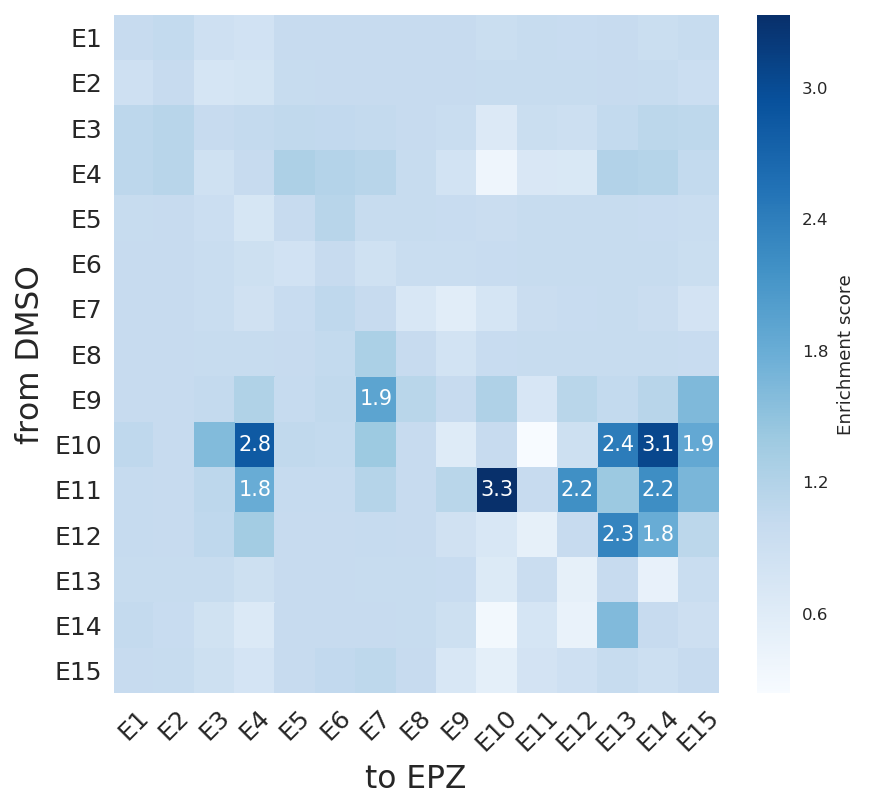

In [63]:

plt.figure(dpi=150,figsize=(6,5.5))
a=sns.heatmap(enrichment, cmap="Blues", annot=True, mask = enrichment < 1.8, cbar=False )
a=sns.heatmap(enrichment, cmap="Blues", cbar_kws={'label': 'Enrichment score'},mask = enrichment > 1.8)
plt.ylabel("from DMSO", size = 15)
plt.xlabel("to EPZ", size = 15)
plt.xticks(rotation=45, size = 12)
plt.yticks(rotation=0, size = 12)
plt.tight_layout()



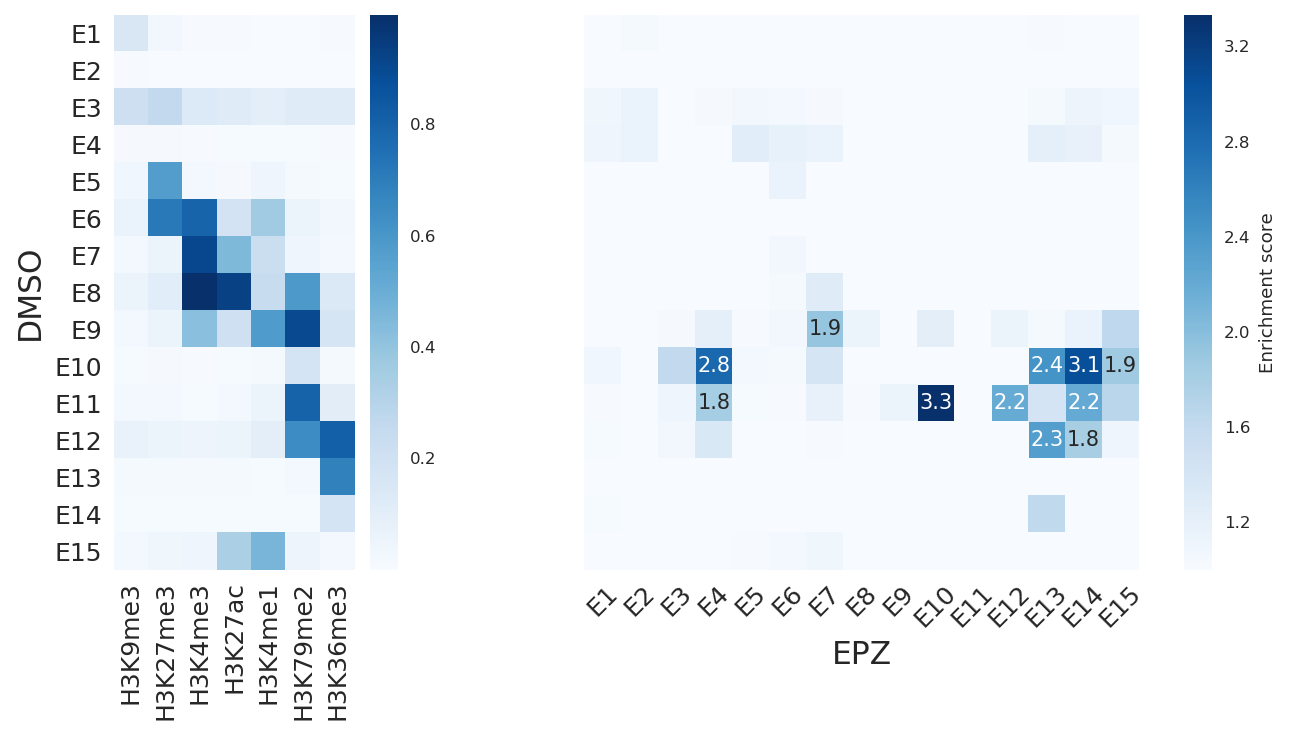

In [64]:
fig,ax=plt.subplots(1,2,dpi=150,figsize=(9,5), gridspec_kw={'width_ratios': [1, 3],"wspace":0}, sharey=True)

emit = pd.read_csv("../INTERMEDIATE_FILES/Model_15_States_NPC48h/emissions_15.txt",sep="\t")
emit = emit[list(emit)[1:]]
a_ = sns.heatmap(emit, cmap="Blues", cbar=True, ax=ax[0], square=False)
ax[0].set_yticklabels(["E{}".format(i) for i in range(1,16)], rotation=0, size = 12)
ax[0].set_xticklabels(list(emit), rotation=90, size = 12)
a=sns.heatmap(enrichment, cmap="Blues", annot=True, vmin=1,mask = enrichment < 1.8, cbar=False,ax=ax[1], square=True)
a=sns.heatmap(enrichment, cmap="Blues", vmin=1, cbar_kws={'label': 'Enrichment score'},mask = enrichment > 1.8,ax=ax[1],square=True)
ax[0].set_ylabel("DMSO", size = 15)
ax[1].set_xlabel("EPZ", size = 15)
ax[1].set_xticklabels(["E{}".format(i) for i in range(1,16)], rotation=45, size = 12)
ax[1].set_yticklabels(["E{}".format(i) for i in range(1,16)], rotation=0, size = 12)

plt.tight_layout()
# plt.savefig("../FIGURES/transition_enrichment_EPZ-treatment_NPC48h.pdf")


In [66]:
back_1 = compute_transitions(MERGED_mESC,["mESC_DMSO_rep1","mESC_DMSO_rep2"], 15)
back_2 = compute_transitions(MERGED_mESC,["mESC_EPZ_rep1","mESC_EPZ_rep2"], 15)
target_1 = compute_transitions(MERGED_mESC,["mESC_DMSO_rep1","mESC_EPZ_rep1"], 15)
target_2 = compute_transitions(MERGED_mESC,["mESC_DMSO_rep2","mESC_EPZ_rep2"], 15)

back = back_1 + back_2 
target = target_1 + target_2 

states = ["E{}".format(k) for k in range(1,15+1)]
enrichment_probs = np.zeros((15,15))
for i in range(15):
    for k in range(15):
        enrichment_probs[i,k] = np.mean([(target.values[i,k]+np.mean(target.values))/ (back.values[i,k]+np.mean(back.values))])
enrichment = pd.DataFrame(enrichment_probs, columns = states, index = states)




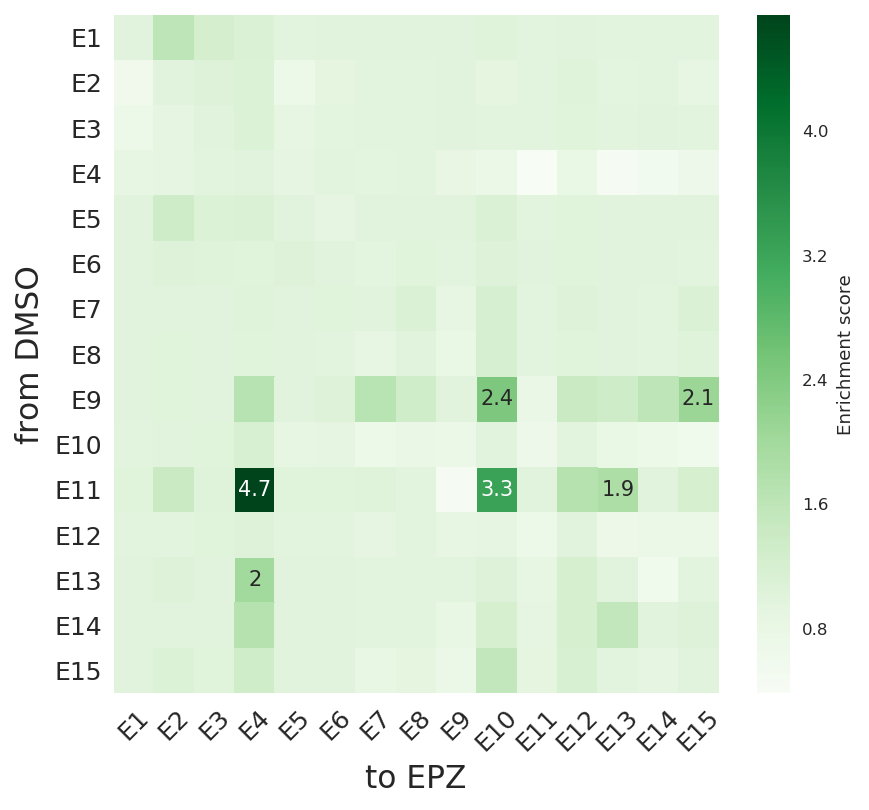

In [67]:
plt.figure(dpi=150,figsize=(6,5.5))
a=sns.heatmap(enrichment, cmap="Greens", annot=True, mask = enrichment < 1.8, cbar=False )
a=sns.heatmap(enrichment, cmap="Greens", cbar_kws={'label': 'Enrichment score'},mask = enrichment > 1.8)
plt.ylabel("from DMSO", size = 15)
plt.xlabel("to EPZ", size = 15)
plt.xticks(rotation=45, size = 12)
plt.yticks(rotation=0, size = 12)
plt.tight_layout()

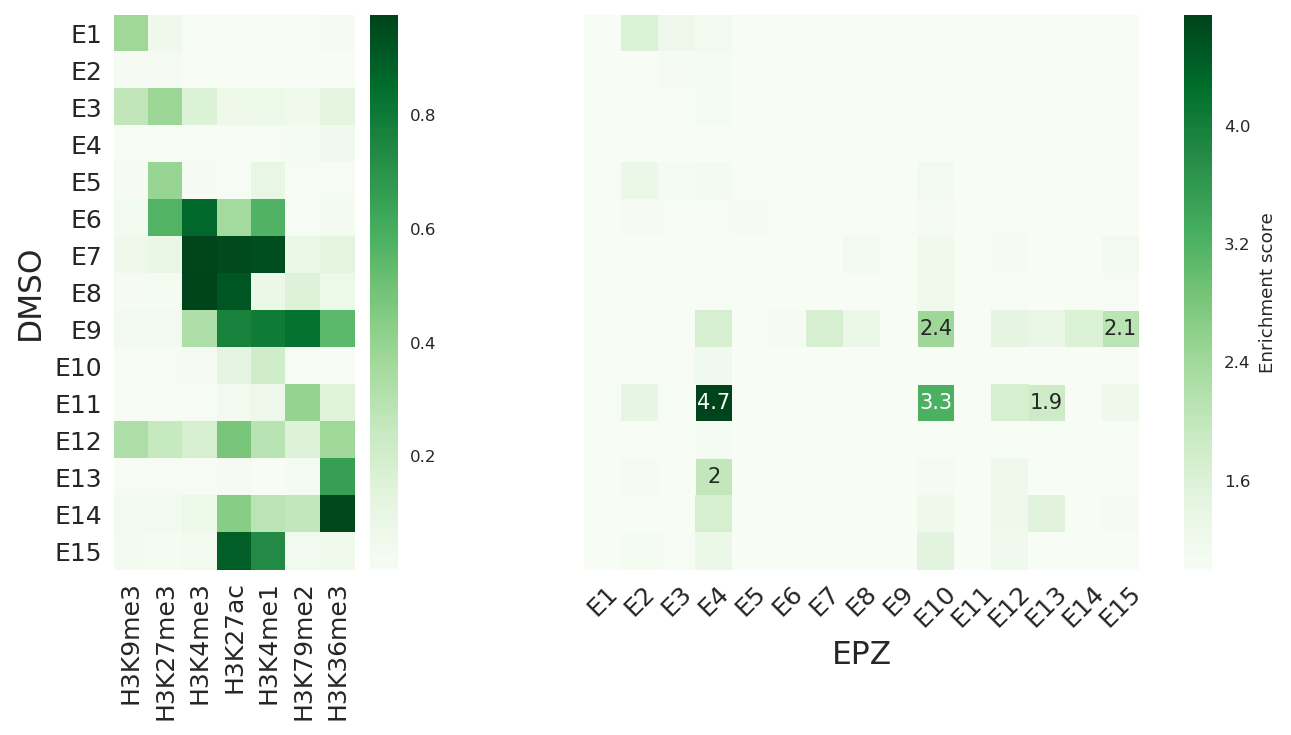

In [69]:
fig,ax=plt.subplots(1,2,dpi=150,figsize=(9,5), gridspec_kw={'width_ratios': [1, 3],"wspace":0}, sharey=True)

emit = pd.read_csv("../INTERMEDIATE_FILES/Model_15_States_reoredered_mESC/emissions_15.txt",sep="\t")
emit = emit[list(emit)[1:][::-1]]
a_ = sns.heatmap(emit, cmap="Greens", cbar=True, ax=ax[0], square=False)
ax[0].set_yticklabels(["E{}".format(i) for i in range(1,16)], rotation=0, size = 12)
ax[0].set_xticklabels(list(emit), rotation=90, size = 12)

a=sns.heatmap(enrichment, cmap="Greens", annot=True, vmin=1,mask = enrichment < 1.8, cbar=False,ax=ax[1], square=True)
a=sns.heatmap(enrichment, cmap="Greens", vmin=1, cbar_kws={'label': 'Enrichment score'}, mask = enrichment > 1.8,ax=ax[1],square=True)

ax[0].set_ylabel("DMSO", size = 15)
ax[1].set_xlabel("EPZ", size = 15)
ax[1].set_xticklabels(["E{}".format(i) for i in range(1,16)], rotation=45, size = 12)
ax[1].set_yticklabels(["E{}".format(i) for i in range(1,16)], rotation=0, size = 12)

plt.tight_layout()
plt.savefig("../FIGURES/transition_enrichment_EPZ-treatment_mESC.pdf")



# PERFORM GENE CLUSTERING ON CHROMATIN STATE DISTRIBUTION OVER PROMOTER AND GENE BODIES

### DEFINE GENE MODEL

#### NPC48h

In [714]:
%%bash

extract_from_gtf.py -w transcript -b_tss 0 -a_tss 200 -prot_cod -o ../INTERMEDIATE_FILES/ \
/home/ferrari/ferrari/my_repository/annotations_gencode/mouse/M18/annotation_snakePipes/gencode.vM18.annotation.sorted.gtf

mv ../INTERMEDIATE_FILES/genes.bed ../INTERMEDIATE_FILES/transcripts.bed

extract_from_gtf.py -f genes -w gene -prot_cod -o ../INTERMEDIATE_FILES/ \
/home/ferrari/ferrari/my_repository/annotations_gencode/mouse/M18/annotation_snakePipes/gencode.vM18.annotation.sorted.gtf


Namespace(AFTER_GENE=0, AFTER_TES=500, AFTER_TSS=200, BEFORE_GENE=0, BEFORE_TES=500, BEFORE_TSS=0, FEATURE=['genes', 'TSS'], PROTEIN_CODING=True, from_what='transcript', gtf_file='/home/ferrari/ferrari/my_repository/annotations_gencode/mouse/M18/annotation_snakePipes/gencode.vM18.annotation.sorted.gtf', out_dir='../INTERMEDIATE_FILES/', verbose=False)
Namespace(AFTER_GENE=0, AFTER_TES=500, AFTER_TSS=500, BEFORE_GENE=0, BEFORE_TES=500, BEFORE_TSS=1000, FEATURE=['genes'], PROTEIN_CODING=True, from_what='gene', gtf_file='/home/ferrari/ferrari/my_repository/annotations_gencode/mouse/M18/annotation_snakePipes/gencode.vM18.annotation.sorted.gtf', out_dir='../INTERMEDIATE_FILES/', verbose=False)


In [715]:
%%bash

bedtools intersect -a ../INTERMEDIATE_FILES/TSS.bed -b ../../figure_1-2/INPUT_DATA/NPC48h_H3K4me3_BAMPE-BAM_consensusPeaks.bed -u| bedtools sort | bedtools merge -s -d 500 -c 4,6 -o distinct,distinct > ../INTERMEDIATE_FILES/NPC48h_H3K4me3pl_TSS.bed

In [716]:
dix_ = {}
k=0
with open("../INTERMEDIATE_FILES/NPC48h_H3K4me3pl_TSS.bed") as tss, open("../INTERMEDIATE_FILES/genes.bed") as genes:
    for line in tss:
        lista = line.strip().split("\t")
        if len(lista[-2].split(",")) == 1:
            gene = lista[-2]
            if lista[-1] == "+":
                tss = lista[1]
            elif lista[-1] == "-":
                tss = lista[2]
            if not gene in dix_:
                dix_[gene] = {'chr':lista[0],'TSS':[tss], 'TES':0, 'strand': lista[-1]}
            else:
                dix_[gene]['TSS'].append(tss)
            
    for line in genes:
        lista = line.strip().split("\t")
        if lista[-2] == "+":
            tss = lista[1]
            tes = lista[2]
        elif lista[-2] == "-":
            tss = lista[2]
            tes = lista[1]
        if not lista[3] in dix_:
            dix_[lista[3]] = {'chr':lista[0],'TSS':[tss], 'TES':tes, 'strand': lista[5], "symbol":lista[-1]}
        else:
            dix_[lista[3]]["symbol"]=lista[-1]
            dix_[lista[3]]["TES"]=tes
p=0    
for i in dix_:
    for l in dix_[i]["TSS"]:
        p+=1
print(p)
print(len(dix_))


23646
21978


In [717]:
j=0
k=0
with open("../INTERMEDIATE_FILES/Gene_Model_ChromSeg_NPC48h.bed",'w') as out:
    for key in dix_:
        j+=1
        for tss in dix_[key]['TSS']:
            k+=1
            if dix_[key]['strand'] == "+":
                if not int(tss)>int(dix_[key]['TES']):
                    
                    out.write('\t'.join([dix_[key]['chr'], tss, dix_[key]['TES'], key, ".", dix_[key]['strand'],dix_[key]['symbol']+"\n"]))
                    #
                else:
                    print(key,dix_[key])
                    
            elif dix_[key]['strand'] == "-":
                if not int(tss)<int(dix_[key]['TES']):
                    out.write('\t'.join([dix_[key]['chr'], dix_[key]['TES'], tss, key, ".", dix_[key]['strand'],dix_[key]['symbol']+"\n"]))
                else:
                    print(key,dix_[key])
                    
print(k,j)

23646 21978


#### mESC

In [718]:
%%bash

bedtools intersect -a ../INTERMEDIATE_FILES/TSS.bed -b ../../figure_1-2/INPUT_DATA/mESC_H3K4me3_BAMPE-BAM_consensusPeaks.bed -u| bedtools sort | bedtools merge -s -d 500 -c 4,6 -o distinct,distinct > ../INTERMEDIATE_FILES/mESC_H3K4me3pl_TSS.bed

In [719]:
dix_ = {}
k=0
with open("../INTERMEDIATE_FILES/mESC_H3K4me3pl_TSS.bed") as tss, open("../INTERMEDIATE_FILES/genes.bed") as genes:
    for line in tss:
        lista = line.strip().split("\t")
        if len(lista[-2].split(",")) == 1:
            gene = lista[-2]
            if lista[-1] == "+":
                tss = lista[1]
            elif lista[-1] == "-":
                tss = lista[2]
            if not gene in dix_:
                dix_[gene] = {'chr':lista[0],'TSS':[tss], 'TES':0, 'strand': lista[-1]}
            else:
                dix_[gene]['TSS'].append(tss)
            
    for line in genes:
        lista = line.strip().split("\t")
        if lista[-2] == "+":
            tss = lista[1]
            tes = lista[2]
        elif lista[-2] == "-":
            tss = lista[2]
            tes = lista[1]
        if not lista[3] in dix_:
            dix_[lista[3]] = {'chr':lista[0],'TSS':[tss], 'TES':tes, 'strand': lista[5], "symbol":lista[-1]}
        else:
            dix_[lista[3]]["symbol"]=lista[-1]
            dix_[lista[3]]["TES"]=tes
p=0    
for i in dix_:
    for l in dix_[i]["TSS"]:
        p+=1
print(p)
print(len(dix_))



24726
21978


In [720]:
j=0
k=0
with open("../INTERMEDIATE_FILES/Gene_Model_ChromSeg_mESC.bed",'w') as out:
    for key in dix_:
        j+=1
        for tss in dix_[key]['TSS']:
            k+=1
            if dix_[key]['strand'] == "+":
                if not int(tss)>int(dix_[key]['TES']):
                    
                    out.write('\t'.join([dix_[key]['chr'], tss, dix_[key]['TES'], key, ".", dix_[key]['strand'],dix_[key]['symbol']+"\n"]))
                    #
                else:
                    print(key,dix_[key])
                    
            elif dix_[key]['strand'] == "-":
                if not int(tss)<int(dix_[key]['TES']):
                    out.write('\t'.join([dix_[key]['chr'], dix_[key]['TES'], tss, key, ".", dix_[key]['strand'],dix_[key]['symbol']+"\n"]))
                else:
                    print(key,dix_[key])
                    
print(k,j)

24726 21978


### COMPUTE % STATES OVERLAPPING PROMOTERS AND GENE BODIES

In [721]:
%%bash

### EXTRACT FEATURES ###

### NPC48h
extract_from_bed.py -f TSS -o ./ -b_tss 1000 -a_tss 500 ../INTERMEDIATE_FILES/Gene_Model_ChromSeg_NPC48h.bed
mv ./TSS.bed ../INTERMEDIATE_FILES/Promoter_Model_ChromSeg_NPC48h.bed

### mESC
extract_from_bed.py -f TSS -o ./ -b_tss 1000 -a_tss 500 ../INTERMEDIATE_FILES/Gene_Model_ChromSeg_mESC.bed
mv ./TSS.bed ../INTERMEDIATE_FILES/Promoter_Model_ChromSeg_mESC.bed

Namespace(AFTER_GENE=0, AFTER_TES=500, AFTER_TSS=500, BEFORE_GENE=0, BEFORE_TES=500, BEFORE_TSS=1000, FEATURE=['TSS'], bed_file='../INTERMEDIATE_FILES/Gene_Model_ChromSeg_NPC48h.bed', limit=False, out_dir='./', verbose=False)
Namespace(AFTER_GENE=0, AFTER_TES=500, AFTER_TSS=500, BEFORE_GENE=0, BEFORE_TES=500, BEFORE_TSS=1000, FEATURE=['TSS'], bed_file='../INTERMEDIATE_FILES/Gene_Model_ChromSeg_mESC.bed', limit=False, out_dir='./', verbose=False)


In [85]:
with open("../INTERMEDIATE_FILES/MakeSegmentation_mESC/merged_reps_DMSO/mESC_15_segments.bed") as inp, open("../INTERMEDIATE_FILES/MakeSegmentation_mESC/merged_reps_DMSO/mESC_15_segments_E.bed",'w') as out:
    for line in inp:
        lista=line.strip().split("\t")
        lista[-1] = "E{}\n".format(lista[-1][1:])
        out.write("\t".join(lista))

In [88]:
%%bash
                                            #######################
                                            ### COMPUTE OVERLAP ###
                                            #######################

### NPC48h
from_segmentation_to_final_table.py -s ../INTERMEDIATE_FILES/MakeSegmentation_NPC48h/merged_reps_DMSO/iNPC_15_segments.bed \
-r ../INTERMEDIATE_FILES/Promoter_Model_ChromSeg_NPC48h.bed ../INTERMEDIATE_FILES/Gene_Model_ChromSeg_NPC48h.bed

mv final_segmentation_matrix.tsv ../INTERMEDIATE_FILES/final_segmentation_matrix_NPC48h.tsv

### mESC
from_segmentation_to_final_table.py -s ../INTERMEDIATE_FILES/MakeSegmentation_mESC/merged_reps_DMSO/mESC_15_segments_E.bed \
-r ../INTERMEDIATE_FILES/Promoter_Model_ChromSeg_mESC.bed ../INTERMEDIATE_FILES/Gene_Model_ChromSeg_mESC.bed

mv final_segmentation_matrix.tsv ../INTERMEDIATE_FILES/final_segmentation_matrix_mESC.tsv

In [89]:
!head ../INTERMEDIATE_FILES/final_segmentation_matrix_mESC.tsv

	E1_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E10_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E11_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E12_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E13_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E14_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E15_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E2_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E3_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E4_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E5_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E6_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E7_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E8_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E9_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E1_intersect_Promoter_Model_ChromSeg_mESC_with_segmentation	E10_intersect_Promoter_Model_ChromSeg_mESC_with_segmentation	E11_intersect_Promoter_Model_Chr

In [723]:
%%bash

/home/ferrari/ferrari/coding_projects/tSNE_chromatin_segmentation/compute_tSNE.py \
-t ../INTERMEDIATE_FILES/final_segmentation_matrix_NPC48h.tsv --seed 88 

mv tSNE_COORDINATES_perp30-seed88.tsv ../INTERMEDIATE_FILES/tSNE_COORDINATES_perp30-seed88_NPC48h.tsv

Namespace(final_table='../INTERMEDIATE_FILES/final_segmentation_matrix_NPC48h.tsv', perplexity=30, seed=88)


/home/ferrari/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ferrari/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ferrari/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ferrari/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [746]:
%%bash

/home/ferrari/ferrari/coding_projects/tSNE_chromatin_segmentation/compute_tSNE.py \
-t ../INTERMEDIATE_FILES/final_segmentation_matrix_mESC.tsv --seed 88 

mv tSNE_COORDINATES_perp30-seed88.tsv ../INTERMEDIATE_FILES/tSNE_COORDINATES_perp30-seed88_mESC.tsv

Namespace(final_table='../INTERMEDIATE_FILES/final_segmentation_matrix_mESC.tsv', perplexity=30, seed=88)


/home/ferrari/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ferrari/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ferrari/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ferrari/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## PLOT t-SNE MAPS

In [28]:
t = pd.read_csv("../INTERMEDIATE_FILES/tSNE_COORDINATES_perp30-seed88_NPC48h.tsv",sep="\t",index_col=0)
t.head()

Dim1       Dim2
ENSMUSG00000051951.5   48.032290 -26.358425
ENSMUSG00000033845.13 -29.683920 -21.790148
ENSMUSG00000033813.15 -35.674750 -32.552444
ENSMUSG00000002459.17  65.741260  -6.283798
ENSMUSG00000033793.12 -26.683622  -0.085980

In [5]:
# import umap
# X_npc = pd.read_csv("../INTERMEDIATE_FILES/final_segmentation_matrix_NPC48h.tsv",sep="\t",index_col=0)
# reducer = umap.UMAP(n_neighbors=100, min_dist=0.8)
# embedding = reducer.fit_transform(X_npc.values)

# t = pd.DataFrame({"Dim1":embedding[:,0],"Dim2":embedding[:, 1]},index=X_npc.index)

/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ferrari/.local/lib/python3.6/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../../../home/ferrari/.local/lib/python3.6/site-packages/umap/rp_

In [29]:
def get_max_state(table_chromatin_states):

    data_df = pd.read_csv(table_chromatin_states, sep="\t", index_col=0)
    cols = list(data_df)
    features = [i.split("_")[2] for i in cols]
    features_def = []
    for i in features:
        if not i in features_def:
            features_def.append(i)
    print(features_def)
    k=0
    max_state_dict = dict()
    for i in range(len(features_def)):
        df_prov = data_df.iloc[:,k:k+int((len(cols)/len(features_def)))]
        k += int(len(cols)/len(features_def))
        maximum = list(df_prov.idxmax(axis=1))
        maximum = [i.split("_")[0] for i in maximum]
        max_state_dict[features_def[i]] = pd.Series(maximum, index=data_df.index)

    df_max_states = pd.DataFrame.from_dict(max_state_dict)
    
    #print(max_state_dict)
    return df_max_states

In [30]:
### PLOT tSNE MAPS ### 
max_st = get_max_state("../INTERMEDIATE_FILES/final_segmentation_matrix_NPC48h.tsv")
max_st
max_st.columns = ["GeneBody","TSS"]
max_st.shape

['Gene', 'Promoter']


(21978, 2)

In [31]:
st = ["E{}".format(i) for i in range(16)[1:]]
cols = ["gray",'gainsboro','rosybrown','dimgray','darkviolet','violet','darkorange','red','forestgreen','paleturquoise','limegreen','dodgerblue','blue','peru','gold']
dix = {}
for k,j in zip(st,cols):
    dix[k]=j

In [32]:
max_st['col_TSS'] = [dix[k] for k in max_st.TSS]
max_st['col_Body'] = [dix[k] for k in max_st.GeneBody]
max_st.head()

GeneBody TSS     col_TSS col_Body
ENSMUSG00000051951.5        E4  E8         red  dimgray
ENSMUSG00000033845.13      E13  E7  darkorange     blue
ENSMUSG00000033813.15      E13  E8         red     blue
ENSMUSG00000002459.17       E4  E6      violet  dimgray
ENSMUSG00000033793.12      E13  E7  darkorange     blue

In [33]:
exp = pd.read_csv("../INTERMEDIATE_FILES/DE_genes_shrinked_apeglm_NPC48h_EPZvsDMSO.tsv",sep='\t')
exp.dropna(inplace=True)
up = list(exp.loc[(exp.padj < 0.05)&(exp.log2FoldChange > 0)].index)
down = list(exp.loc[(exp.padj < 0.05)&(exp.log2FoldChange < 0)].index)
exp.shape

(15184, 6)

In [34]:
max_st_1 = max_st.merge(exp, how='left', left_index=True,right_index=True)
max_st_1.shape

(21978, 10)

In [35]:
count = pd.read_csv("../INPUT_DATA/counts_NPC48h_TPM.tsv",sep='\t',index_col=0)
count.head()
max_st_1["logMean"] = np.log10(count.mean(axis=1)+1)
max_st_1.shape
max_st_1.head()

GeneBody TSS     col_TSS col_Body      baseMean  \
ENSMUSG00000051951.5        E4  E8         red  dimgray   1989.822396   
ENSMUSG00000033845.13      E13  E7  darkorange     blue   4478.860744   
ENSMUSG00000033813.15      E13  E8         red     blue   9358.883424   
ENSMUSG00000002459.17       E4  E6      violet  dimgray    539.261730   
ENSMUSG00000033793.12      E13  E7  darkorange     blue  13963.514129   

                       log2FoldChange     lfcSE    pvalue      padj   symbol  \
ENSMUSG00000051951.5        -0.006377  0.051828  0.770507  0.957820     Xkr4   
ENSMUSG00000033845.13       -0.047314  0.060307  0.155325  0.633635   Mrpl15   
ENSMUSG00000033813.15       -0.021726  0.046340  0.445054  0.860634    Tcea1   
ENSMUSG00000002459.17        0.010956  0.053100  0.571538  0.903773    Rgs20   
ENSMUSG00000033793.12        0.003606  0.045555  0.811300  0.966476  Atp6v1h   

                        logMean  
ENSMUSG00000051951.5   1.174081  
ENSMUSG00000033845.13  1.371179  
ENSMUSG00000033813.15  2.124020  
ENSMUSG00000002459.17  0.806616  
ENSMUSG00000033793.12  1.791513

In [36]:
gene_expr = max_st_1[["logMean"]]
gene_expr = gene_expr.loc[gene_expr.logMean > 0.2]

In [37]:
minima = 0
maxima = 3
norm = colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Greys)
mapper.set_array(max_st_1.logMean)
rgba_list=[]
for v in max_st_1.logMean:
    rgba_list.append(mapper.to_rgba(v))
max_st_1["col_exp"] = rgba_list

In [38]:
max_st_1.sort_values(by="logMean",inplace=True)

max_st_1.shape

(21978, 12)

In [39]:
max_st_2 = max_st_1.merge(t, how='left',left_index=True,right_index=True)
max_st_2

GeneBody  TSS        col_TSS     col_Body  \
ENSMUSG00000096850.1        E2   E2      gainsboro    gainsboro   
ENSMUSG00000066810.2        E4   E4        dimgray      dimgray   
ENSMUSG00000091159.1       E13  E13           blue         blue   
ENSMUSG00000111842.1       E13   E7     darkorange         blue   
ENSMUSG00000010205.11      E13  E10  paleturquoise         blue   
...                        ...  ...            ...          ...   
ENSMUSG00000064341.1        E1   E1           gray         gray   
ENSMUSG00000037742.14       E9   E8            red  forestgreen   
ENSMUSG00000072235.6        E8   E8            red          red   
ENSMUSG00000064370.1        E1   E1           gray         gray   
ENSMUSG00000064351.1        E1   E1           gray         gray   

                            baseMean  log2FoldChange     lfcSE    pvalue  \
ENSMUSG00000096850.1             NaN             NaN       NaN       NaN   
ENSMUSG00000066810.2             NaN             NaN       NaN       NaN   
ENSMUSG00000091159.1             NaN             NaN       NaN       NaN   
ENSMUSG00000111842.1             NaN             NaN       NaN       NaN   
ENSMUSG00000010205.11            NaN             NaN       NaN       NaN   
...                              ...             ...       ...       ...   
ENSMUSG00000064341.1   196084.839466       -0.008950  0.043583  0.765017   
ENSMUSG00000037742.14  559403.098867       -0.007309  0.042131  0.952366   
ENSMUSG00000072235.6   459699.268916        0.001231  0.043559  0.965078   
ENSMUSG00000064370.1   323324.264053        0.028134  0.047734  0.446075   
ENSMUSG00000064351.1   832094.101103        0.056962  0.060016  0.230834   

                           padj   symbol   logMean               col_exp  \
ENSMUSG00000096850.1        NaN      NaN  0.000000  (1.0, 1.0, 1.0, 1.0)   
ENSMUSG00000066810.2        NaN      NaN  0.000000  (1.0, 1.0, 1.0, 1.0)   
ENSMUSG00000091159.1        NaN      NaN  0.000000  (1.0, 1.0, 1.0, 1.0)   
ENSMUSG00000111842.1        NaN      NaN  0.000000  (1.0, 1.0, 1.0, 1.0)   
ENSMUSG00000010205.11       NaN      NaN  0.000000  (1.0, 1.0, 1.0, 1.0)   
...                         ...      ...       ...                   ...   
ENSMUSG00000064341.1   0.956271   mt-Nd1  3.939866  (0.0, 0.0, 0.0, 1.0)   
ENSMUSG00000037742.14  0.991879   Eef1a1  3.979835  (0.0, 0.0, 0.0, 1.0)   
ENSMUSG00000072235.6   0.994652   Tuba1a  4.034716  (0.0, 0.0, 0.0, 1.0)   
ENSMUSG00000064370.1   0.860965  mt-Cytb  4.078877  (0.0, 0.0, 0.0, 1.0)   
ENSMUSG00000064351.1   0.720892   mt-Co1  4.358813  (0.0, 0.0, 0.0, 1.0)   

                            Dim1       Dim2  
ENSMUSG00000096850.1  -58.512030   2.858360  
ENSMUSG00000066810.2  -13.072793  28.650450  
ENSMUSG00000091159.1   46.660145 -62.108230  
ENSMUSG00000111842.1  -30.354980 -25.819668  
ENSMUSG00000010205.11 -26.172184 -44.858180  
...                          ...        ...  
ENSMUSG00000064341.1    3.154694 -42.131680  
ENSMUSG00000037742.14   5.189976 -74.245910  
ENSMUSG00000072235.6   10.123589 -70.212260  
ENSMUSG00000064370.1    3.154644 -42.131702  
ENSMUSG00000064351.1    3.154697 -42.131668  

[21978 rows x 14 columns]

In [923]:
max_st_2.to_csv("../INTERMEDIATE_FILES/classification_genesStates_NPC48h.tsv",sep="\t")

/package/anaconda3/bin/ipython:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  import re
/package/anaconda3/bin/ipython:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  import sys


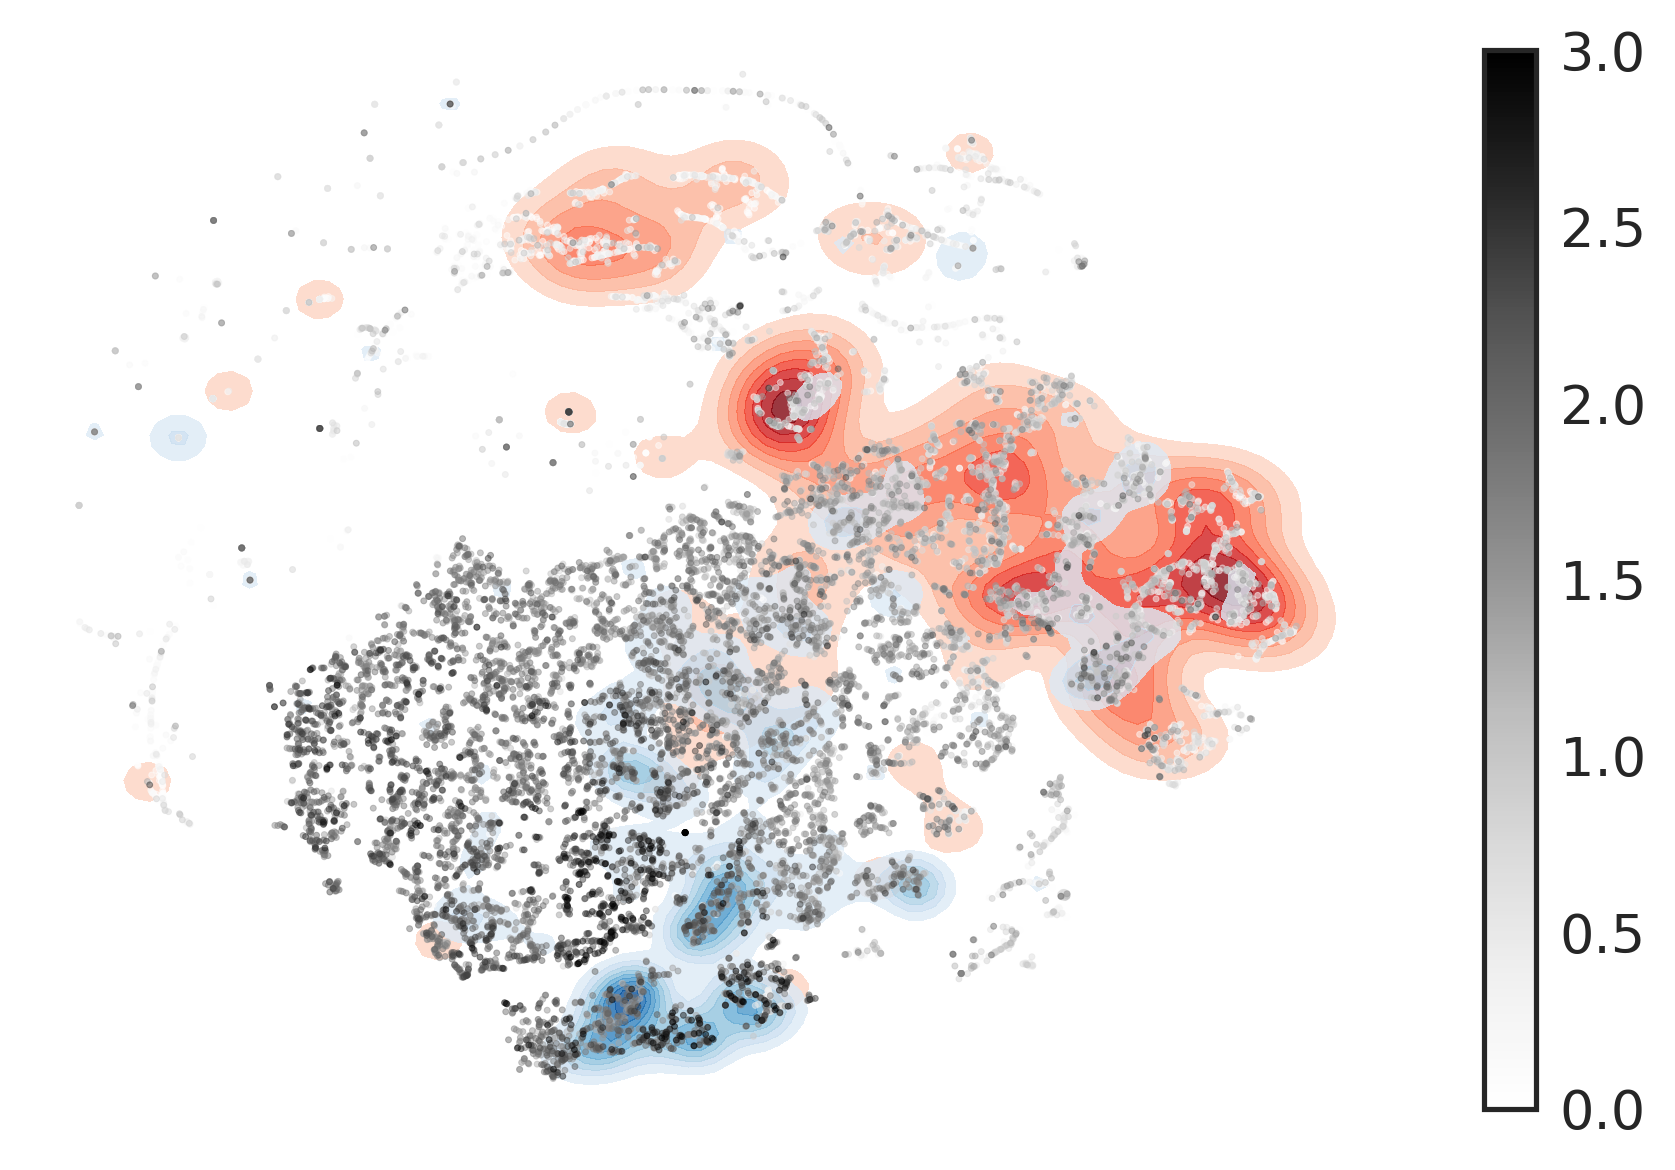

In [40]:
plt.figure(dpi=300)

# rel.density_scatter(max_st_2.Dim1.values,max_st_2.Dim2.values)
a=sns.kdeplot(max_st_2.Dim1.loc[up].dropna(),max_st_2.Dim2.loc[up].dropna(), cmap="Reds", shade=True,shade_lowest=False, bw=5, alpha=0.8)
b=sns.kdeplot(max_st_2.Dim1.loc[down].dropna(),max_st_2.Dim2.loc[down].dropna(), cmap="Blues", shade=True,bw=3,shade_lowest=False, alpha=0.8)


plt.scatter(max_st_2.Dim1,max_st_2.Dim2,s=2, c=max_st_2.col_exp, label = "genes", alpha=0.5)
cbar=plt.colorbar(mapper)
# cbar.set_label('Log TPM')
cbar.ax.tick_params(labelsize=13)
# plt.scatter(t.Dim1.loc[up],t.Dim2.loc[up],s=5, facecolors='none', edgecolors='r', linewidth=0.5,label = "upregulated genes")
# plt.scatter(t.Dim1.loc[down],t.Dim2.loc[down],s=5, facecolors='none', edgecolors='b', linewidth=0.5, label = "downregulated genes")
# plt.legend(fontsize="xx-small")
plt.axis('off')
plt.tight_layout()
# plt.savefig("../FIGURES/tSNE_expression_ProtCoding_NPC48h.png")

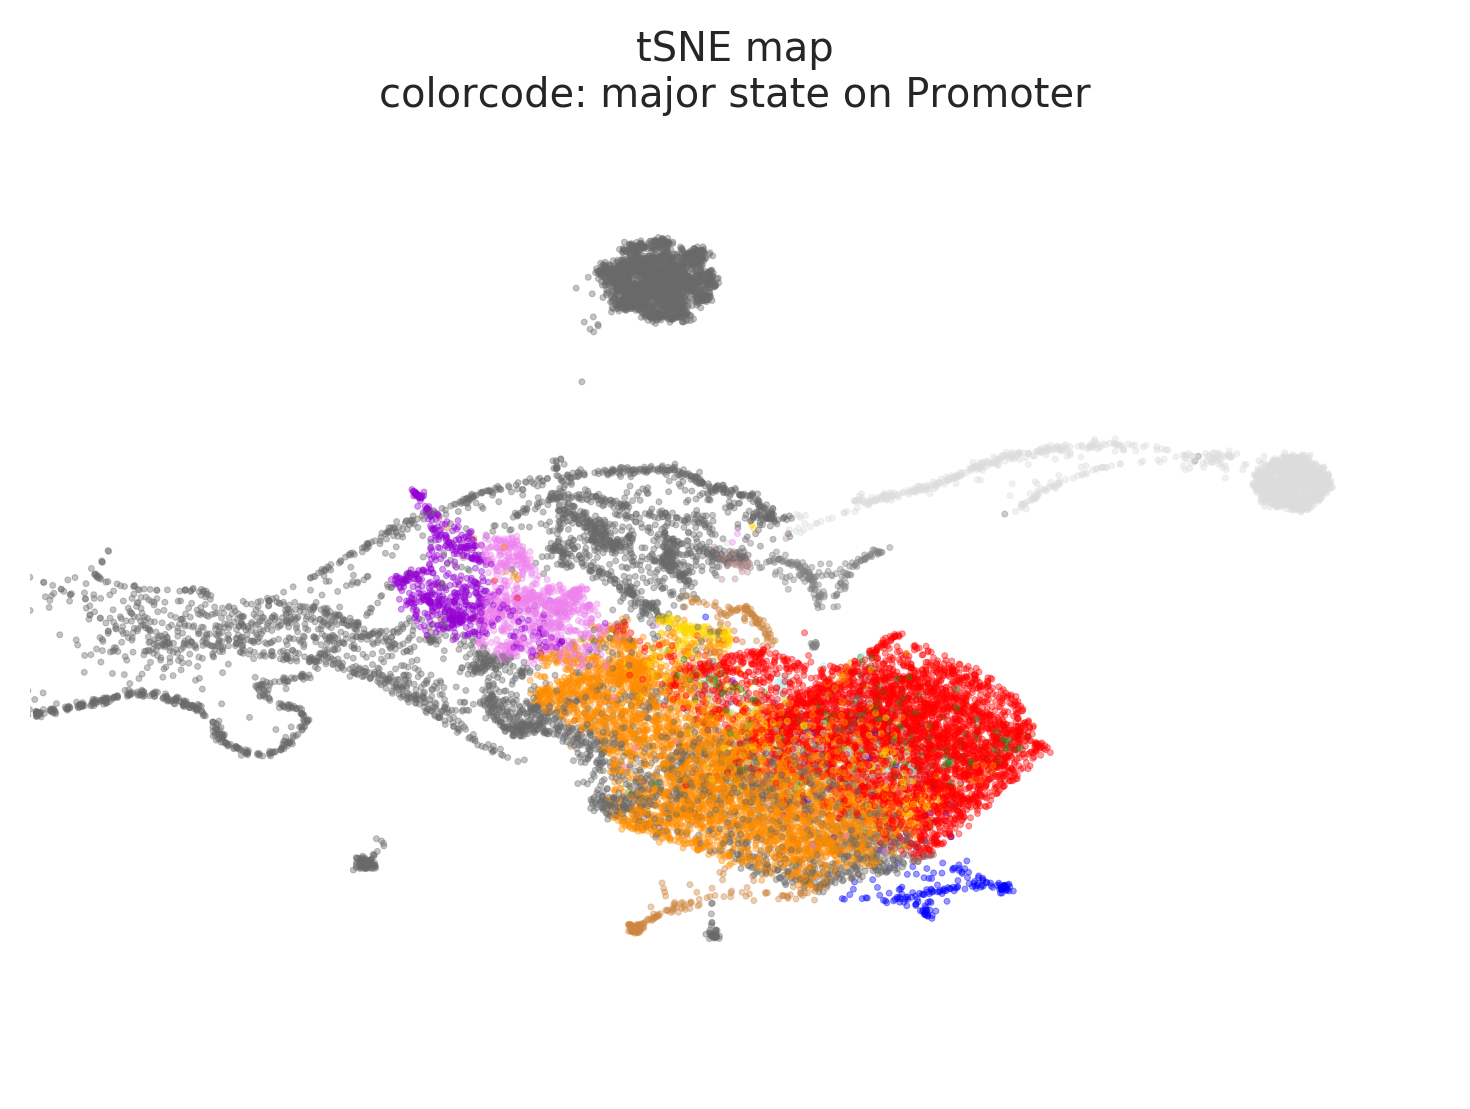

In [27]:
plt.figure(dpi=300,figsize=(5,3.8))

plt.scatter(max_st_2.Dim1,max_st_2.Dim2,s=2, color=max_st_2.col_TSS, label = "genes", alpha=0.4)
#cbar=plt.colorbar(mapper)
#cbar.set_label('Log Counts')
#plt.scatter(t.Dim1.loc[up],t.Dim2.loc[up],s=5, facecolors='none', edgecolors='r', linewidth=0.7,label = "upregulated genes")
#plt.scatter(t.Dim1.loc[down],t.Dim2.loc[down],s=5, facecolors='none', edgecolors='limegreen', linewidth=0.7, label = "downregulated genes")
#plt.legend(fontsize="xx-small")
markers = [plt.Line2D([0,0],[0,0], color=color, marker="o", linestyle="") for color in dix.values()]
plt.legend(markers, dix.keys(), numpoints=1, fontsize='small', bbox_to_anchor=(0, 0.9, 0, 0))
plt.title("tSNE map\ncolorcode: major state on Promoter")
plt.axis('off')
plt.tight_layout()
plt.savefig("../FIGURES/tSNE_stateTSS_protCoding_NPC48h.png")

In [62]:
tab = pd.read_csv("../INTERMEDIATE_FILES/classification_genesStates_NPC48h.tsv", sep="\t", index_col=0)
tr = dict(zip(["E{}".format(i) for i in range(1,16)], range(15)))
tab["state_code_TSS"] = [tr[k] for k in tab.TSS]
tab["state_code_Body"] = [tr[k] for k in tab.GeneBody]
tab.dropna(axis=0, subset = ["log2FoldChange"], inplace=True)
tab

GeneBody  TSS  col_TSS     col_Body       baseMean  \
ENSMUSG00000061462.17       E4   E4  dimgray      dimgray      71.438091   
ENSMUSG00000051747.14       E4   E4  dimgray      dimgray     347.061634   
ENSMUSG00000026395.16       E4   E4  dimgray      dimgray      85.933884   
ENSMUSG00000020014.17       E4  E15     gold      dimgray      69.201938   
ENSMUSG00000026950.17       E4   E4  dimgray      dimgray     148.337814   
...                        ...  ...      ...          ...            ...   
ENSMUSG00000064341.1        E1   E1     gray         gray  196084.839466   
ENSMUSG00000037742.14       E9   E8      red  forestgreen  559403.098867   
ENSMUSG00000072235.6        E8   E8      red          red  459699.268916   
ENSMUSG00000064370.1        E1   E1     gray         gray  323324.264053   
ENSMUSG00000064351.1        E1   E1     gray         gray  832094.101103   

                       log2FoldChange     lfcSE    pvalue      padj   symbol  \
ENSMUSG00000061462.17       -0.000937  0.055120  0.877396  0.979155    Obscn   
ENSMUSG00000051747.14       -0.020460  0.058699  0.200618  0.686696      Ttn   
ENSMUSG00000026395.16        1.405113  0.373388  0.000005  0.001162    Ptprc   
ENSMUSG00000020014.17        0.001088  0.055182  0.901681  0.982922   Cfap54   
ENSMUSG00000026950.17        0.013855  0.056997  0.246841  0.735133      Neb   
...                               ...       ...       ...       ...      ...   
ENSMUSG00000064341.1        -0.008950  0.043583  0.765017  0.956271   mt-Nd1   
ENSMUSG00000037742.14       -0.007309  0.042131  0.952366  0.991879   Eef1a1   
ENSMUSG00000072235.6         0.001231  0.043559  0.965078  0.994652   Tuba1a   
ENSMUSG00000064370.1         0.028134  0.047734  0.446075  0.860965  mt-Cytb   
ENSMUSG00000064351.1         0.056962  0.060016  0.230834  0.720892   mt-Co1   

                        logMean  \
ENSMUSG00000061462.17  0.043555   
ENSMUSG00000051747.14  0.052104   
ENSMUSG00000026395.16  0.078265   
ENSMUSG00000020014.17  0.079723   
ENSMUSG00000026950.17  0.092778   
...                         ...   
ENSMUSG00000064341.1   3.939866   
ENSMUSG00000037742.14  3.979835   
ENSMUSG00000072235.6   4.034716   
ENSMUSG00000064370.1   4.078877   
ENSMUSG00000064351.1   4.358813   

                                                                 col_exp  \
ENSMUSG00000061462.17  (0.9944636678200692, 0.9944636678200692, 0.994...   
ENSMUSG00000051747.14  (0.9926182237600922, 0.9926182237600922, 0.992...   
ENSMUSG00000026395.16  (0.9889273356401385, 0.9889273356401385, 0.988...   
ENSMUSG00000020014.17  (0.9889273356401385, 0.9889273356401385, 0.988...   
ENSMUSG00000026950.17  (0.9870818915801615, 0.9870818915801615, 0.987...   
...                                                                  ...   
ENSMUSG00000064341.1                                (0.0, 0.0, 0.0, 1.0)   
ENSMUSG00000037742.14                               (0.0, 0.0, 0.0, 1.0)   
ENSMUSG00000072235.6                                (0.0, 0.0, 0.0, 1.0)   
ENSMUSG00000064370.1                                (0.0, 0.0, 0.0, 1.0)   
ENSMUSG00000064351.1                                (0.0, 0.0, 0.0, 1.0)   

                            Dim1       Dim2  state_code_TSS  state_code_Body  
ENSMUSG00000061462.17  16.547512  64.403340               3                3  
ENSMUSG00000051747.14 -40.151810  80.402794               3                3  
ENSMUSG00000026395.16 -16.858067  59.155636               3                3  
ENSMUSG00000020014.17  17.525660  26.270845              14                3  
ENSMUSG00000026950.17   5.176964  68.187416               3                3  
...                          ...        ...             ...              ...  
ENSMUSG00000064341.1    3.154694 -42.131680               0                0  
ENSMUSG00000037742.14   5.189976 -74.245910               7                8  
ENSMUSG00000072235.6   10.123589 -70.212260               7                7  
ENSMUSG00000064370.1    

/home/ferrari/.local/lib/python3.6/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, alpha, sigma_1, mu_1]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:40<00:00, 199.62draws/s]
/home/ferrari/.local/lib/python3.6/site-packages/pymc3/stats.py:982: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


mean        sd  mc_error   hpd_2.5  hpd_97.5        n_eff  \
mu_1      -0.006517  0.005098  0.000060 -0.016940  0.003353  6017.352691   
alpha__0  -0.026558  0.008161  0.000092 -0.042739 -0.010922  7174.058457   
alpha__1  -0.013611  0.007814  0.000084 -0.029429  0.001439  8371.435574   
alpha__2  -0.002135  0.011556  0.000132 -0.023614  0.020990  8276.898913   
alpha__3   0.001653  0.001499  0.000016 -0.001410  0.004397  8498.726589   
alpha__4   0.024868  0.004151  0.000047  0.016891  0.033028  8513.773360   
alpha__5   0.008098  0.003150  0.000037  0.001672  0.014057  8043.763078   
alpha__6  -0.009613  0.001235  0.000014 -0.011997 -0.007201  8120.459562   
alpha__7  -0.023040  0.001239  0.000015 -0.025468 -0.020754  7678.567389   
alpha__8  -0.019078  0.005342  0.000051 -0.029637 -0.009200  9809.643654   
alpha__9  -0.014173  0.005236  0.000063 -0.024516 -0.004269  7561.569511   
alpha__10 -0.025128  0.013537  0.000172 -0.052252  0.000915  6646.812585   
alpha__11 -0.003382  0.013561  0.000150 -0.031289  0.023051  7688.605659   
alpha__12  0.000504  0.007232  0.000079 -0.013762  0.014271  9459.428452   
alpha__13  0.002839  0.005127  0.000057 -0.008307  0.012139  8328.036770   
alpha__14 -0.000002  0.003878  0.000037 -0.007646  0.007089  8674.775938   
sigma_1    0.017370  0.004498  0.000075  0.009689  0.026167  4094.359499   
sigma      0.081386  0.000467  0.000005  0.080472  0.082306  7763.984659   

               Rhat  
mu_1       0.999926  
alpha__0   0.999600  
alpha__1   0.999666  
alpha__2   0.999722  
alpha__3   0.999697  
alpha__4   0.999536  
alpha__5   0.999769  
alpha__6   1.000066  
alpha__7   0.999809  
alpha__8   0.999591  
alpha__9   0.999635  
alpha__10  0.999680  
alpha__11  0.999633  
alpha__12  0.999660  
alpha__13  0.999619  
alpha__14  0.999627  
sigma_1    1.001994  
sigma      0.999671

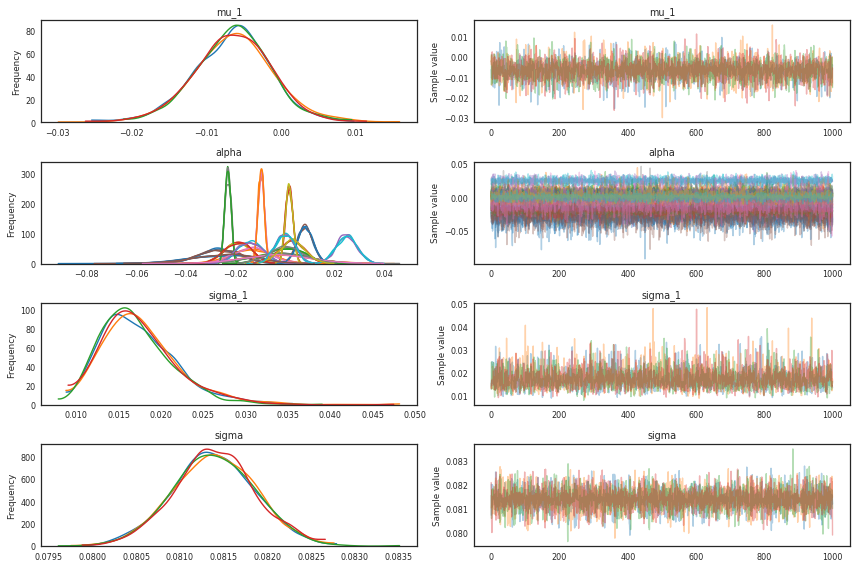

In [888]:
with pm.Model() as m4:
    
    mu_1 = pm.Normal('mu_1',0,1)
    sigma_1 = pm.Exponential('sigma_1',lam=1)
    alpha = pm.Normal('alpha',mu_1,sigma_1,shape=15)
    sigma = pm.Exponential('sigma',lam=1)
    
    mu = alpha[tab.state_code_TSS]
    
    lfc = pm.Normal('lfc', mu=mu, sd=sigma, observed=tab.log2FoldChange)
    
    trace_m4 = pm.sample(1000,tune=1000)

pm.traceplot(trace_m4)
pm.summary(trace_m4)

/home/ferrari/.local/lib/python3.6/site-packages/pymc3/plots/forestplot.py:318: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  ticks.tick1On = False
/home/ferrari/.local/lib/python3.6/site-packages/pymc3/plots/forestplot.py:319: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  ticks.tick2On = False
/home/ferrari/.local/lib/python3.6/site-packages/pymc3/plots/forestplot.py:318: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  ticks.tick1On = False
/home/ferrari/.local/lib/python3.6/site-packages/pymc3/plots/forestplot.py:319: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible inste

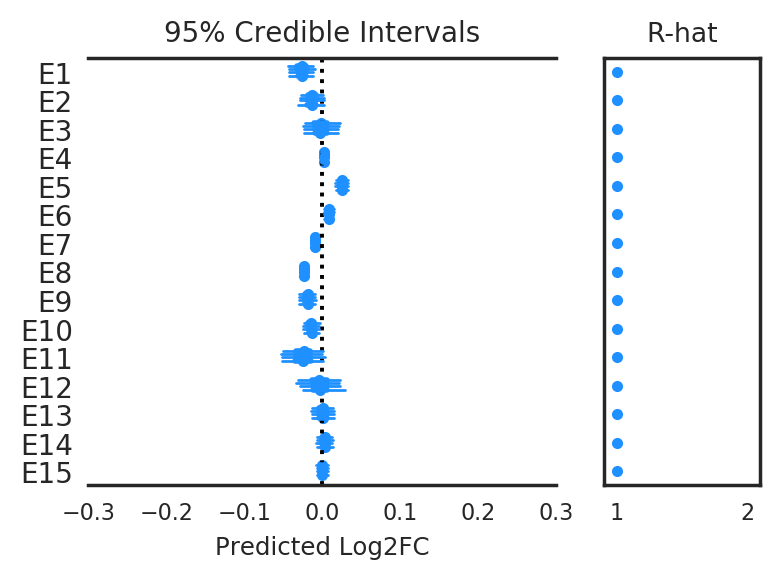

In [889]:
fig,ax=plt.subplots(dpi=200, figsize=(4,3))
# 
p = pm.forestplot(trace_m4, xlim=(-0.3,0.3),varnames=["alpha"], ylabels=["E{}".format(i) for i in range(1,16)],colors='dodgerblue')
plt.xlabel("Predicted Log2FC")
p.tight_layout(fig)

plt.savefig("../FIGURES/bayesian_model_meanLFC_perChromState_NPC48h.pdf")

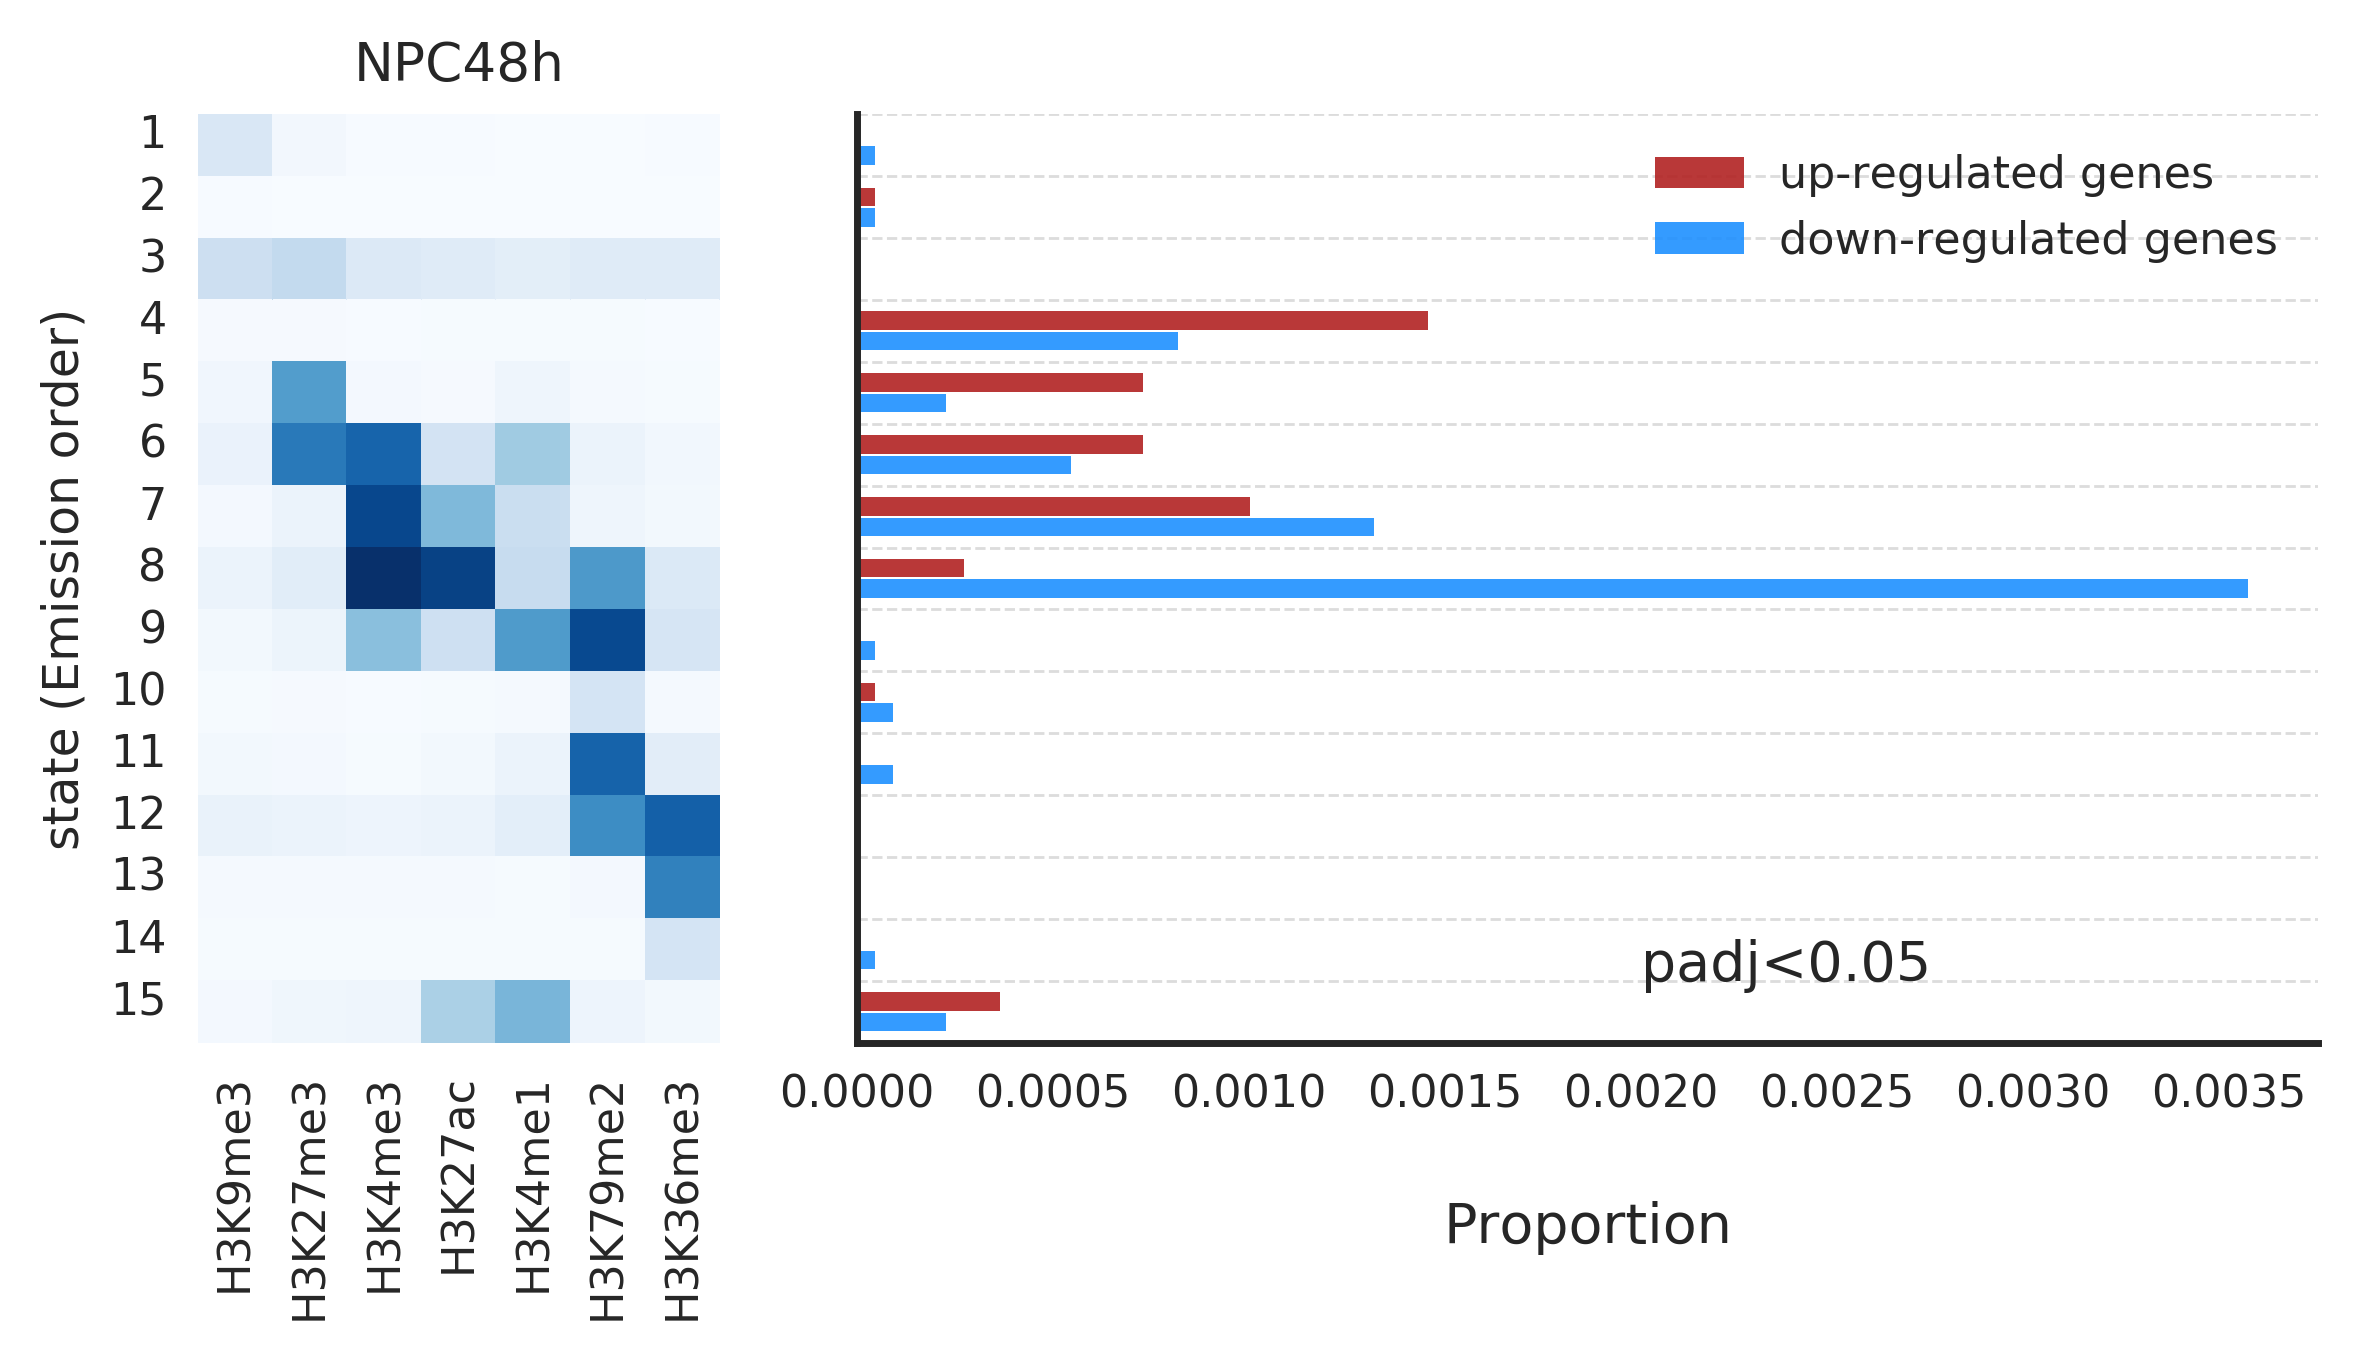

In [929]:
fig, ax = plt.subplots(1,2, dpi=400, sharey=True, figsize=(6,3.5), gridspec_kw = {'width_ratios':[1, 2.8]})
sns.set_style("white")
em = pd.read_csv("../INTERMEDIATE_FILES/Model_15_States_NPC48h/emissions_15.txt",sep="\t",index_col=0)
em = em[list(em)]
a = sns.heatmap(em,cmap=cm.Blues, cbar=False, ax = ax[0])
a.tick_params(right=True,  left=False, labelright=False, labelleft=True)
a.set_title("NPC48h")
a.set_yticks(np.array(range(16)))
a.set_yticklabels(a.get_yticklabels(), rotation = 0, fontsize = 8, va='top')
# ax[0].set_yticklabels([plt.text(,i+0.7,i+1) for i in range(15)], rotation = 0, fontsize = 8, va='top')
ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize = 8)
#sns.set(font_scale=0.5)


#DE GENE RATIO 
fdr=0.05

#back = max_st_3.groupby("TSS").count().col_TSS
#back.loc[back<200] = np.nan
back_up = max_st_2.shape[0]
#max_st_3.loc[(max_st_3.padj<fdr)&(max_st_3.log2FoldChange>0)].shape[0]
back_down = max_st_2.shape[0]
#max_st_3.loc[(max_st_3.padj<fdr)&(max_st_3.log2FoldChange<0)].shape[0]
targ_up = max_st_2.groupby("TSS").count().to_dict()["GeneBody"]
targ_up_ref = max_st_2.loc[(max_st_2.padj<fdr)&(max_st_2.log2FoldChange>0)].groupby("TSS").count().col_TSS.to_dict()
for i in targ_up:
    if i in targ_up_ref:
        targ_up[i] = [targ_up_ref[i]]
    else:
        targ_up[i] = [0]
targ_up = pd.DataFrame(targ_up).T.reindex(["E{}".format(i) for i in range(1,16)])

targ_down = max_st_2.groupby("TSS").count().to_dict()["GeneBody"]
targ_down_ref = max_st_2.loc[(max_st_2.padj<fdr)&(max_st_2.log2FoldChange<0)].groupby("TSS").count().col_TSS.to_dict()
for i in targ_down:
    if i in targ_down_ref:
        targ_down[i] = [targ_down_ref[i]]
    else:
        targ_down[i] = [0]
targ_down = pd.DataFrame(targ_down).T.reindex(["E{}".format(i) for i in range(1,16)])

upp = targ_up/back_up
downn = targ_down/back_down


# upp = upp.reindex(["E{}".format(i) for i in range(16)[1:]])
# downn = downn.reindex(["E{}".format(i) for i in range(16)[1:]])
#print(upp)
ax[1].barh(np.array(range(15))+0.333, upp.values.reshape(-1), height=0.3, alpha=0.9, color='firebrick', label="up-regulated genes")
ax[1].barh(np.array(range(15))+0.666, downn.values.reshape(-1), height=0.3, alpha=0.9, color='dodgerblue', label="down-regulated genes")
ax[1].set_yticks(np.array(range(16)))
ax[1].annotate("padj<{}".format(fdr),(0.002,14))
for i in range(16):
    ax[1].axhline(i, linestyle='--',linewidth=0.5,color='gainsboro')
    
# Hide the right and top spines
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].set_xlabel("\nProportion",size=10)
ax[1].legend(loc=1)

plt.tight_layout()
#ax[0].get_yticklabels()
# upp.values.reshape(-1)
plt.savefig("../FIGURES/Prop_ChromState_TSS_NPC48h.pdf")

In [25]:
t = pd.read_csv("../INTERMEDIATE_FILES/tSNE_COORDINATES_perp30-seed88_mESC.tsv",sep="\t",index_col=0)
t.shape

(21978, 2)

In [26]:
st = ["E{}".format(i) for i in range(16)[1:]]
cols = ["gray",'gainsboro','rosybrown','dimgray','darkviolet','violet','darkorange','red','forestgreen','paleturquoise','limegreen','dodgerblue','blue','peru','gold']
dix = {}
for k,j in zip(st,cols):
    dix[k]=j

In [27]:
!head ../INTERMEDIATE_FILES/final_segmentation_matrix_mESC.tsv

	E1_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E10_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E11_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E12_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E13_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E14_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E15_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E2_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E3_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E4_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E5_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E6_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E7_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E8_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E9_intersect_Gene_Model_ChromSeg_mESC_with_segmentation	E1_intersect_Promoter_Model_ChromSeg_mESC_with_segmentation	E10_intersect_Promoter_Model_ChromSeg_mESC_with_segmentation	E11_intersect_Promoter_Model_Chr

In [28]:
### PLOT tSNE MAPS ### 
max_st = get_max_state("../INTERMEDIATE_FILES/final_segmentation_matrix_mESC.tsv")
max_st
max_st.columns = ["GeneBody","TSS"]
max_st.shape

['Gene', 'Promoter']


(21978, 2)

In [29]:
max_st['col_TSS'] = [dix[k] for k in max_st.TSS]
max_st['col_Body'] = [dix[k] for k in max_st.GeneBody]
max_st.head()

GeneBody TSS col_TSS   col_Body
ENSMUSG00000051951.5        E2  E8     red  gainsboro
ENSMUSG00000025902.13       E6  E6  violet     violet
ENSMUSG00000033845.13      E13  E8     red       blue
ENSMUSG00000033813.15      E13  E8     red       blue
ENSMUSG00000002459.17       E2  E6  violet  gainsboro

In [30]:
exp = pd.read_csv("../INTERMEDIATE_FILES/DE_genes_shrinked_apeglm_mESC_EPZvsDMSO.tsv",sep='\t')
exp.dropna(inplace=True)
up = list(exp.loc[(exp.padj < 0.01)&(exp.log2FoldChange > 0)].index)
down = list(exp.loc[(exp.padj < 0.01)&(exp.log2FoldChange < 0)].index)
exp.shape

(15104, 6)

In [31]:
max_st_1 = max_st.merge(exp, how='left', left_index=True,right_index=True)
max_st_1.shape

(21978, 10)

In [32]:
count = pd.read_csv("../INPUT_DATA/counts_mESC_TPM.tsv",sep='\t',index_col=0)
count.head()
max_st_1["logMean"] = np.log10(count.mean(axis=1)+1)
max_st_1.shape
max_st_1.head()

GeneBody TSS col_TSS   col_Body      baseMean  \
ENSMUSG00000051951.5        E2  E8     red  gainsboro     77.153115   
ENSMUSG00000025902.13       E6  E6  violet     violet           NaN   
ENSMUSG00000033845.13      E13  E8     red       blue  11828.709274   
ENSMUSG00000033813.15      E13  E8     red       blue  12229.695944   
ENSMUSG00000002459.17       E2  E6  violet  gainsboro    101.755920   

                       log2FoldChange     lfcSE    pvalue      padj  symbol  \
ENSMUSG00000051951.5        -0.013618  0.093932  0.618917  0.810965    Xkr4   
ENSMUSG00000025902.13             NaN       NaN       NaN       NaN     NaN   
ENSMUSG00000033845.13        0.043491  0.049869  0.310840  0.567499  Mrpl15   
ENSMUSG00000033813.15        0.041576  0.047650  0.311789  0.568408   Tcea1   
ENSMUSG00000002459.17        0.053544  0.110040  0.134248  0.342511   Rgs20   

                        logMean  
ENSMUSG00000051951.5   0.135000  
ENSMUSG00000025902.13  0.104328  
ENSMUSG00000033845.13  1.611440  
ENSMUSG00000033813.15  2.068270  
ENSMUSG00000002459.17  0.228155

In [33]:
gene_expr = max_st_1[["logMean"]]
gene_expr = gene_expr.loc[gene_expr.logMean > 0.2]

In [34]:
minima = 0
maxima = 3
norm = colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Greys)
mapper.set_array(max_st_1.logMean)
rgba_list=[]
for v in max_st_1.logMean:
    rgba_list.append(mapper.to_rgba(v))
max_st_1["col_exp"] = rgba_list

In [35]:
max_st_1.sort_values(by="logMean",inplace=True)

max_st_1.shape

(21978, 12)

In [36]:
max_st_2 = max_st_1.merge(t, how='left',left_index=True,right_index=True)
max_st_2

GeneBody TSS     col_TSS       col_Body      baseMean  \
ENSMUSG00000096850.1        E2  E2   gainsboro      gainsboro           NaN   
ENSMUSG00000083361.4        E2  E2   gainsboro      gainsboro           NaN   
ENSMUSG00000074302.1        E4  E4     dimgray        dimgray           NaN   
ENSMUSG00000075378.2        E2  E2   gainsboro      gainsboro           NaN   
ENSMUSG00000070023.5        E2  E2   gainsboro      gainsboro           NaN   
...                        ...  ..         ...            ...           ...   
ENSMUSG00000060461.5       E10  E7  darkorange  paleturquoise  1.992317e+05   
ENSMUSG00000064341.1        E1  E1        gray           gray  3.096202e+05   
ENSMUSG00000007892.8        E8  E8         red            red  2.105604e+05   
ENSMUSG00000037742.14       E8  E8         red            red  1.131906e+06   
ENSMUSG00000064351.1        E1  E1        gray           gray  2.392060e+06   

                       log2FoldChange     lfcSE        pvalue          padj  \
ENSMUSG00000096850.1              NaN       NaN           NaN           NaN   
ENSMUSG00000083361.4              NaN       NaN           NaN           NaN   
ENSMUSG00000074302.1              NaN       NaN           NaN           NaN   
ENSMUSG00000075378.2              NaN       NaN           NaN           NaN   
ENSMUSG00000070023.5              NaN       NaN           NaN           NaN   
...                               ...       ...           ...           ...   
ENSMUSG00000060461.5        -0.019301  0.090062  4.047040e-01  6.527495e-01   
ENSMUSG00000064341.1        -0.251164  0.160125  7.610134e-03  4.922632e-02   
ENSMUSG00000007892.8        -0.027192  0.045887  5.002907e-01  7.277645e-01   
ENSMUSG00000037742.14        0.024111  0.044561  5.428753e-01  7.590893e-01   
ENSMUSG00000064351.1        -0.395463  0.060898  6.032982e-12  1.183405e-09   

                       symbol   logMean               col_exp       Dim1  \
ENSMUSG00000096850.1      NaN  0.000000  (1.0, 1.0, 1.0, 1.0)   8.898956   
ENSMUSG00000083361.4      NaN  0.000000  (1.0, 1.0, 1.0, 1.0)  11.142227   
ENSMUSG00000074302.1      NaN  0.000000  (1.0, 1.0, 1.0, 1.0)  28.319010   
ENSMUSG00000075378.2      NaN  0.000000  (1.0, 1.0, 1.0, 1.0) -23.978220   
ENSMUSG00000070023.5      NaN  0.000000  (1.0, 1.0, 1.0, 1.0) -49.032402   
...                       ...       ...                   ...        ...   
ENSMUSG00000060461.5   Dppa5a  3.962502  (0.0, 0.0, 0.0, 1.0)  -4.356465   
ENSMUSG00000064341.1   mt-Nd1  3.965226  (0.0, 0.0, 0.0, 1.0)  -7.607683   
ENSMUSG00000007892.8    Rplp1  4.081978  (0.0, 0.0, 0.0, 1.0) -24.336270   
ENSMUSG00000037742.14  Eef1a1  4.114194  (0.0, 0.0, 0.0, 1.0) -17.434380   
ENSMUSG00000064351.1   mt-Co1  4.645690  (0.0, 0.0, 0.0, 1.0)  -7.607668   

                            Dim2  
ENSMUSG00000096850.1   36.691498  
ENSMUSG00000083361.4   37.768925  
ENSMUSG00000074302.1   21.648312  
ENSMUSG00000075378.2   42.220592  
ENSMUSG00000070023.5   69.970350  
...                          ...  
ENSMUSG00000060461.5  -12.574472  
ENSMUSG00000064341.1   20.653711  
ENSMUSG00000007892.8  -41.291160  
ENSMUSG00000037742.14 -46.564660  
ENSMUSG00000064351.1   20.653769  

[21978 rows x 14 columns]

In [46]:
max_st_2.to_csv("../INTERMEDIATE_FILES/classification_genesStates_mESC.tsv",sep="\t")

/package/anaconda3/bin/ipython:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  import re
/package/anaconda3/bin/ipython:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  import sys


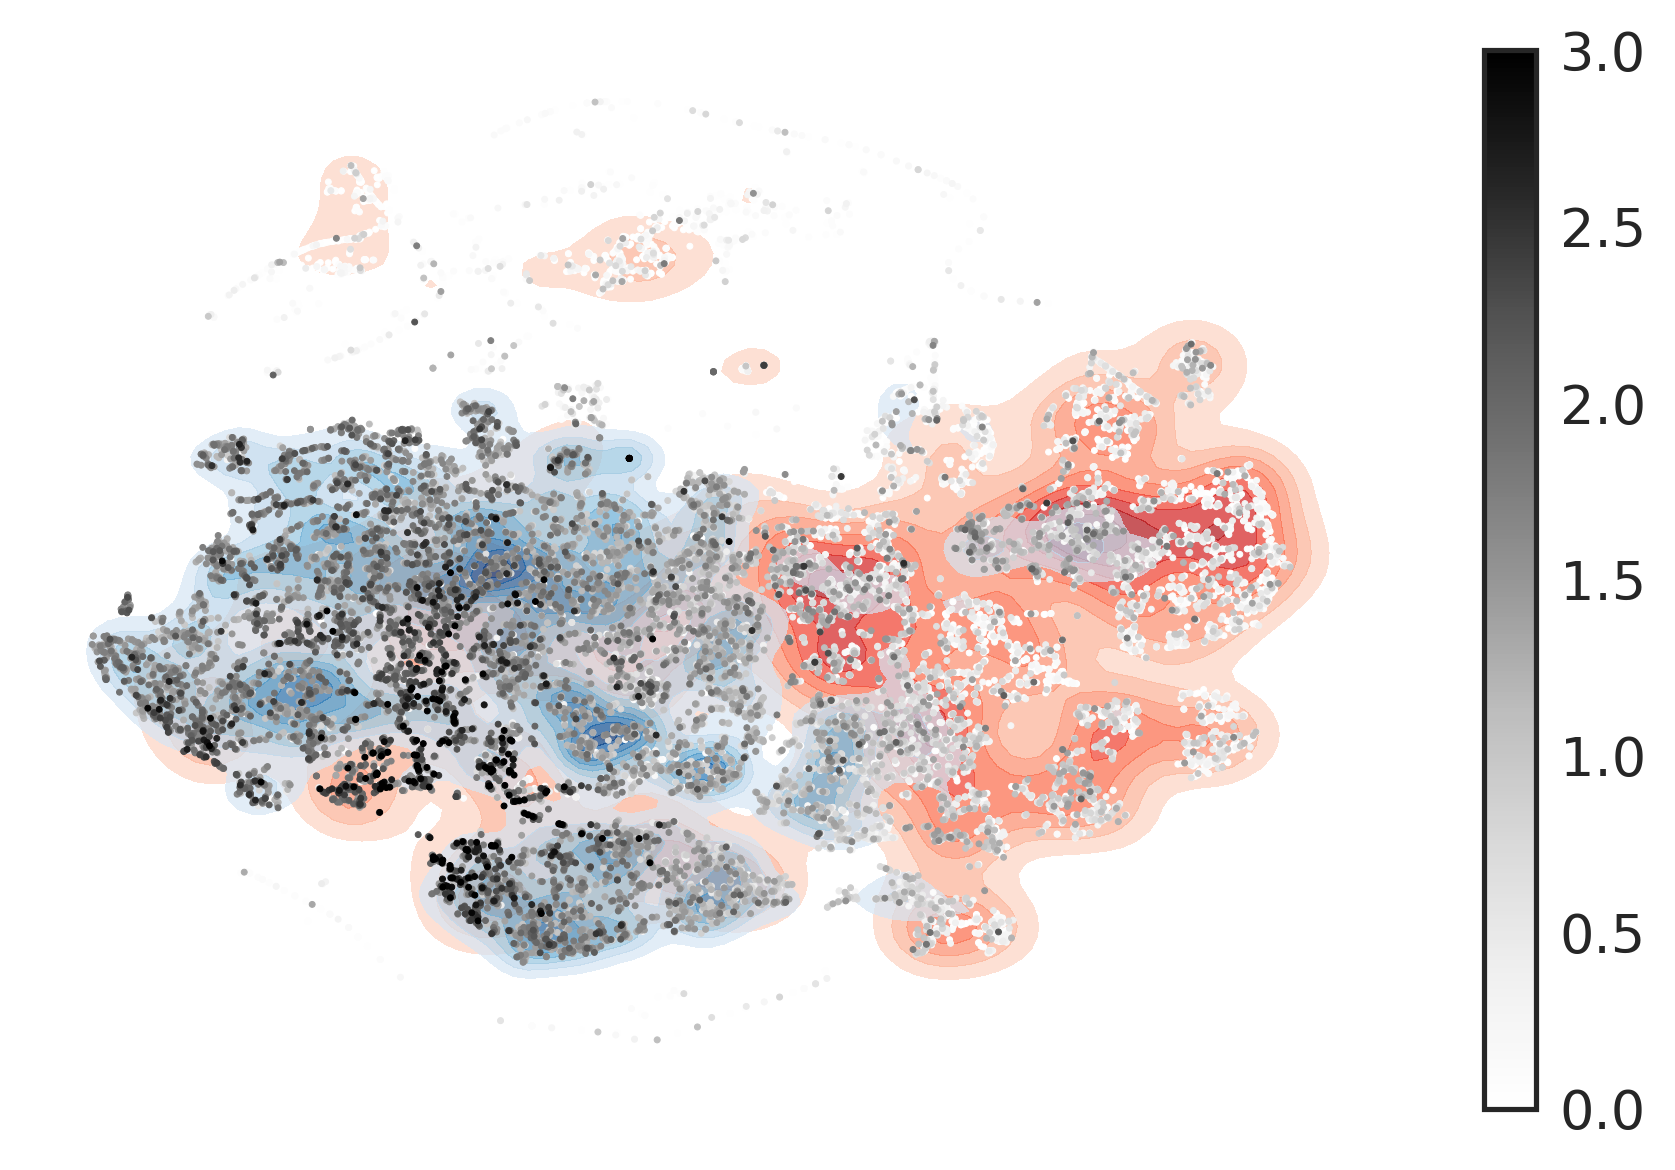

In [40]:
plt.figure(dpi=300)

# rel.density_scatter(max_st_2.Dim1.values,max_st_2.Dim2.values)
a=sns.kdeplot(max_st_2.Dim1.loc[up].dropna(),max_st_2.Dim2.loc[up].dropna(), cmap="Reds", shade=True,shade_lowest=False, bw=5, alpha=0.7)
b=sns.kdeplot(max_st_2.Dim1.loc[down].dropna(),max_st_2.Dim2.loc[down].dropna(), cmap="Blues", shade=True,bw=3,shade_lowest=False, alpha=0.7)

plt.scatter(max_st_2.Dim1,max_st_2.Dim2,s=2, c=max_st_2.col_exp, label = "genes", alpha=1)
cbar=plt.colorbar(mapper)
# cbar.set_label('Log TPM')
cbar.ax.tick_params(labelsize=13)
# plt.scatter(t.Dim1.loc[up],t.Dim2.loc[up],s=5, facecolors='none', edgecolors='r', linewidth=0.5,label = "upregulated genes")
# plt.scatter(t.Dim1.loc[down],t.Dim2.loc[down],s=5, facecolors='none', edgecolors='b', linewidth=0.5, label = "downregulated genes")
# plt.legend(fontsize="xx-small")
plt.axis('off')
plt.tight_layout()
plt.savefig("../FIGURES/tSNE_expression_ProtCoding_mESC.png")

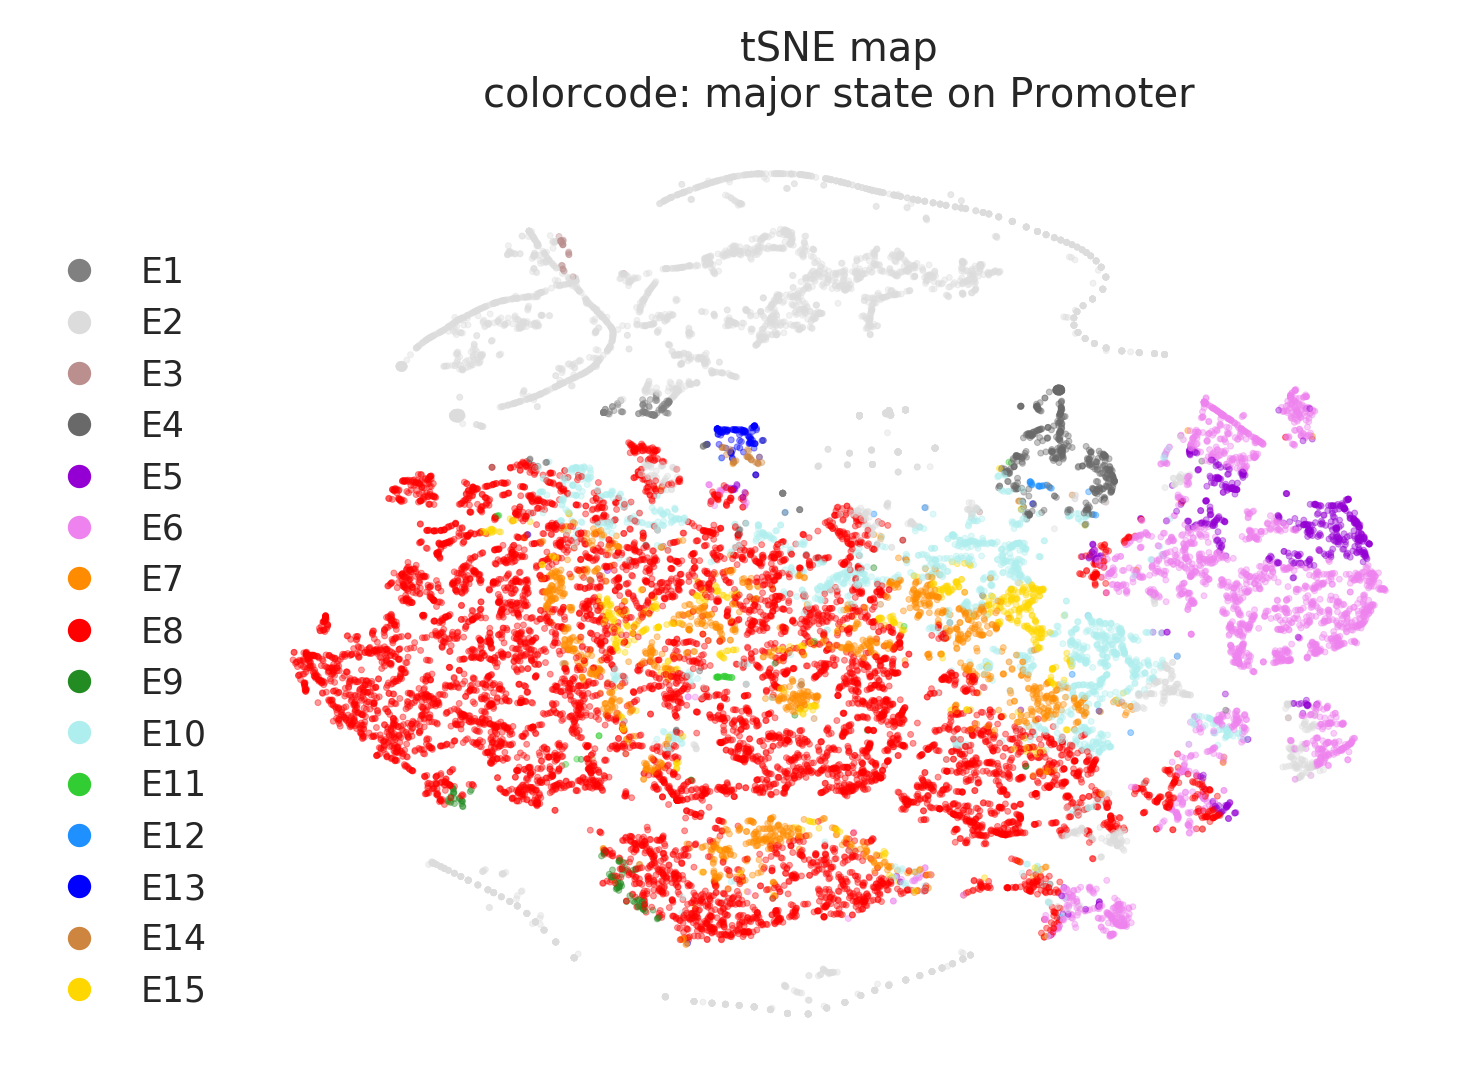

In [41]:
plt.figure(dpi=300,figsize=(5,3.8))

plt.scatter(max_st_2.Dim1,max_st_2.Dim2,s=2, color=max_st_2.col_TSS, label = "genes", alpha=0.4)
#cbar=plt.colorbar(mapper)
#cbar.set_label('Log Counts')
#plt.scatter(t.Dim1.loc[up],t.Dim2.loc[up],s=5, facecolors='none', edgecolors='r', linewidth=0.7,label = "upregulated genes")
#plt.scatter(t.Dim1.loc[down],t.Dim2.loc[down],s=5, facecolors='none', edgecolors='limegreen', linewidth=0.7, label = "downregulated genes")
#plt.legend(fontsize="xx-small")
markers = [plt.Line2D([0,0],[0,0], color=color, marker="o", linestyle="") for color in dix.values()]
plt.legend(markers, dix.keys(), numpoints=1, fontsize='small', bbox_to_anchor=(0, 0.9, 0, 0))
plt.title("tSNE map\ncolorcode: major state on Promoter")
plt.axis('off')
plt.tight_layout()
plt.savefig("../FIGURES/tSNE_stateTSS_protCoding_mESC.png")

In [52]:
tab = pd.read_csv("../INTERMEDIATE_FILES/classification_genesStates_mESC.tsv", sep="\t", index_col=0)
tr = dict(zip(["E{}".format(i) for i in range(1,16)], range(15)))
tab["state_code_TSS"] = [tr[k] for k in tab.TSS]
tab["state_code_Body"] = [tr[k] for k in tab.GeneBody]
tab.dropna(axis=0, subset = ["log2FoldChange"], inplace=True)
tab

GeneBody  TSS     col_TSS       col_Body      baseMean  \
ENSMUSG00000051747.14       E2   E2   gainsboro      gainsboro  8.749850e+01   
ENSMUSG00000026950.17       E2  E15        gold      gainsboro  8.590474e+01   
ENSMUSG00000051331.15       E2   E6      violet      gainsboro  6.885892e+01   
ENSMUSG00000042453.14       E2   E6      violet      gainsboro  8.732379e+01   
ENSMUSG00000040710.10       E2   E6      violet      gainsboro  7.394254e+01   
...                        ...  ...         ...            ...           ...   
ENSMUSG00000060461.5       E10   E7  darkorange  paleturquoise  1.992317e+05   
ENSMUSG00000064341.1        E1   E1        gray           gray  3.096202e+05   
ENSMUSG00000007892.8        E8   E8         red            red  2.105604e+05   
ENSMUSG00000037742.14       E8   E8         red            red  1.131906e+06   
ENSMUSG00000064351.1        E1   E1        gray           gray  2.392060e+06   

                       log2FoldChange     lfcSE        pvalue          padj  \
ENSMUSG00000051747.14        0.013502  0.093245  6.491650e-01  8.288304e-01   
ENSMUSG00000026950.17        0.012647  0.092798  6.746674e-01  8.436275e-01   
ENSMUSG00000051331.15        0.018713  0.095203  4.981194e-01  7.259207e-01   
ENSMUSG00000042453.14        0.011295  0.092182  7.162208e-01  8.671582e-01   
ENSMUSG00000040710.10        0.047221  0.107839  1.337388e-01  3.419287e-01   
...                               ...       ...           ...           ...   
ENSMUSG00000060461.5        -0.019301  0.090062  4.047040e-01  6.527495e-01   
ENSMUSG00000064341.1        -0.251164  0.160125  7.610134e-03  4.922632e-02   
ENSMUSG00000007892.8        -0.027192  0.045887  5.002907e-01  7.277645e-01   
ENSMUSG00000037742.14        0.024111  0.044561  5.428753e-01  7.590893e-01   
ENSMUSG00000064351.1        -0.395463  0.060898  6.032982e-12  1.183405e-09   

                        symbol   logMean  \
ENSMUSG00000051747.14      Ttn  0.009206   
ENSMUSG00000026950.17      Neb  0.038392   
ENSMUSG00000051331.15  Cacna1c  0.038837   
ENSMUSG00000042453.14     Reln  0.043570   
ENSMUSG00000040710.10  St8sia4  0.043776   
...                        ...       ...   
ENSMUSG00000060461.5    Dppa5a  3.962502   
ENSMUSG00000064341.1    mt-Nd1  3.965226   
ENSMUSG00000007892.8     Rplp1  4.081978   
ENSMUSG00000037742.14   Eef1a1  4.114194   
ENSMUSG00000064351.1    mt-Co1  4.645690   

                                                                 col_exp  \
ENSMUSG00000051747.14                               (1.0, 1.0, 1.0, 1.0)   
ENSMUSG00000026950.17  (0.9944636678200692, 0.9944636678200692, 0.994...   
ENSMUSG00000051331.15  (0.9944636678200692, 0.9944636678200692, 0.994...   
ENSMUSG00000042453.14  (0.9944636678200692, 0.9944636678200692, 0.994...   
ENSMUSG00000040710.10  (0.9944636678200692, 0.9944636678200692, 0.994...   
...                                                                  ...   
ENSMUSG00000060461.5                                (0.0, 0.0, 0.0, 1.0)   
ENSMUSG00000064341.1                                (0.0, 0.0, 0.0, 1.0)   
ENSMUSG00000007892.8                                (0.0, 0.0, 0.0, 1.0)   
ENSMUSG00000037742.14                               (0.0, 0.0, 0.0, 1.0)   
ENSMUSG00000064351.1                                (0.0, 0.0, 0.0, 1.0)   

                            Dim1       Dim2  state_code_TSS  state_code_Body  
ENSMUSG00000051747.14  -9.278508  59.292630               1                1  
ENSMUSG00000026950.17  36.392204 -13.816681              14                1  
ENSMUSG00000051331.15  69.630875 -13.786551               5                1  
ENSMUSG00000042453.14  67.944840 -12.385903               5                1  
ENSMUSG00000040710.10  54.279045 -44.943195               5                1  
...                          ...        ...             ...              ...  
ENSMUSG00000060461.5   -4.356465 -12.574472               6                9  
ENSMUSG00000064341.1   -7.607683  20.6

/home/ferrari/.local/lib/python3.6/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, alpha, sigma_1, mu_1]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:44<00:00, 180.90draws/s]
/home/ferrari/.local/lib/python3.6/site-packages/pymc3/stats.py:982: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


mean        sd  mc_error   hpd_2.5  hpd_97.5        n_eff  \
mu_1       0.021939  0.027244  0.000452 -0.029989  0.077060  4360.319316   
alpha__0  -0.139475  0.027169  0.000343 -0.195527 -0.087926  5829.676338   
alpha__1   0.053489  0.005917  0.000079  0.042308  0.064987  6038.973623   
alpha__2   0.271705  0.105959  0.001797  0.069647  0.470479  3247.458461   
alpha__3   0.011316  0.012187  0.000142 -0.014499  0.033915  6994.692245   
alpha__4   0.098783  0.009517  0.000109  0.079521  0.116864  6976.039277   
alpha__5   0.059013  0.003917  0.000047  0.050926  0.066351  6083.058362   
alpha__6   0.003691  0.003889  0.000047 -0.003656  0.011269  6716.299999   
alpha__7  -0.015804  0.001549  0.000017 -0.018844 -0.012696  8608.684271   
alpha__8  -0.007879  0.015087  0.000171 -0.038135  0.020755  7684.971556   
alpha__9   0.038055  0.004279  0.000053  0.029718  0.046266  7638.434896   
alpha__10 -0.031332  0.035163  0.000446 -0.099121  0.036915  6461.252574   
alpha__11 -0.032270  0.030159  0.000311 -0.092344  0.026285  8158.843707   
alpha__12  0.000595  0.022038  0.000238 -0.042822  0.043708  7957.020024   
alpha__13  0.002116  0.022967  0.000276 -0.042062  0.047212  6020.697207   
alpha__14  0.017513  0.006199  0.000063  0.006524  0.030720  9290.317073   
sigma_1    0.098910  0.032346  0.000568  0.044039  0.162314  2761.701507   
sigma      0.139358  0.000846  0.000010  0.137698  0.140941  8654.438427   

               Rhat  
mu_1       0.999939  
alpha__0   1.000142  
alpha__1   0.999849  
alpha__2   0.999912  
alpha__3   0.999799  
alpha__4   0.999549  
alpha__5   0.999559  
alpha__6   0.999723  
alpha__7   0.999544  
alpha__8   0.999712  
alpha__9   0.999916  
alpha__10  0.999656  
alpha__11  0.999686  
alpha__12  0.999697  
alpha__13  0.999742  
alpha__14  0.999766  
sigma_1    1.000269  
sigma      0.999702

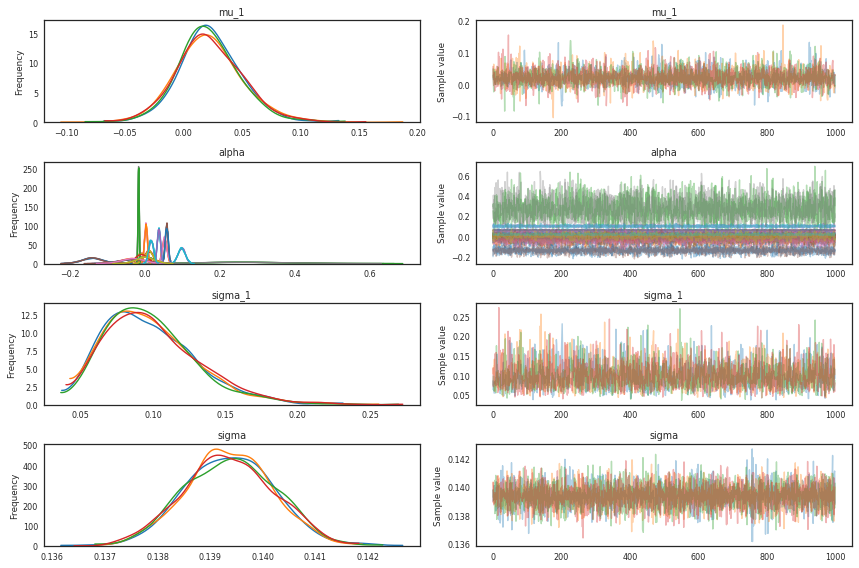

In [53]:
with pm.Model() as m4:
    
    mu_1 = pm.Normal('mu_1',0,1)
    sigma_1 = pm.Exponential('sigma_1',lam=1)
    alpha = pm.Normal('alpha',mu_1,sigma_1,shape=15)
    sigma = pm.Exponential('sigma',lam=1)
    
    mu = alpha[tab.state_code_TSS]
    
    lfc = pm.Normal('lfc', mu=mu, sd=sigma, observed=tab.log2FoldChange)
    
    trace_m4 = pm.sample(1000,tune=1000)

pm.traceplot(trace_m4)
pm.summary(trace_m4)

In [54]:
sns.color_palette("Greens").as_hex()

['#e1f3dc', '#bce4b5', '#8ed08b', '#56b567', '#2c944c', '#05712f']

/home/ferrari/.local/lib/python3.6/site-packages/pymc3/plots/forestplot.py:318: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  ticks.tick1On = False
/home/ferrari/.local/lib/python3.6/site-packages/pymc3/plots/forestplot.py:319: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  ticks.tick2On = False
/home/ferrari/.local/lib/python3.6/site-packages/pymc3/plots/forestplot.py:318: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  ticks.tick1On = False
/home/ferrari/.local/lib/python3.6/site-packages/pymc3/plots/forestplot.py:319: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible inste

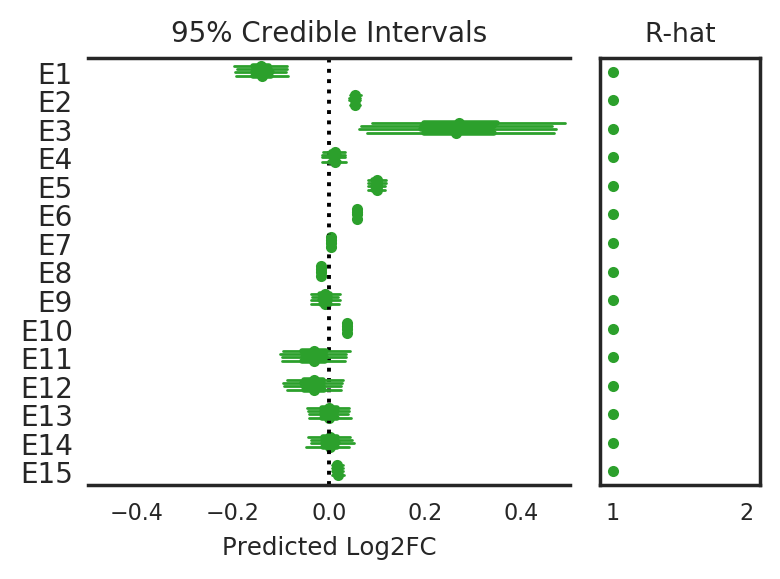

In [56]:
fig,ax=plt.subplots(dpi=200, figsize=(4,3))
# 
p = pm.forestplot(trace_m4, xlim=(-0.5,0.5),varnames=["alpha"], ylabels=["E{}".format(i) for i in range(1,16)],colors='C2')
plt.xlabel("Predicted Log2FC")
p.tight_layout(fig)
plt.savefig("../FIGURES/bayesian_model_meanLFC_perChromState_mESC.pdf")

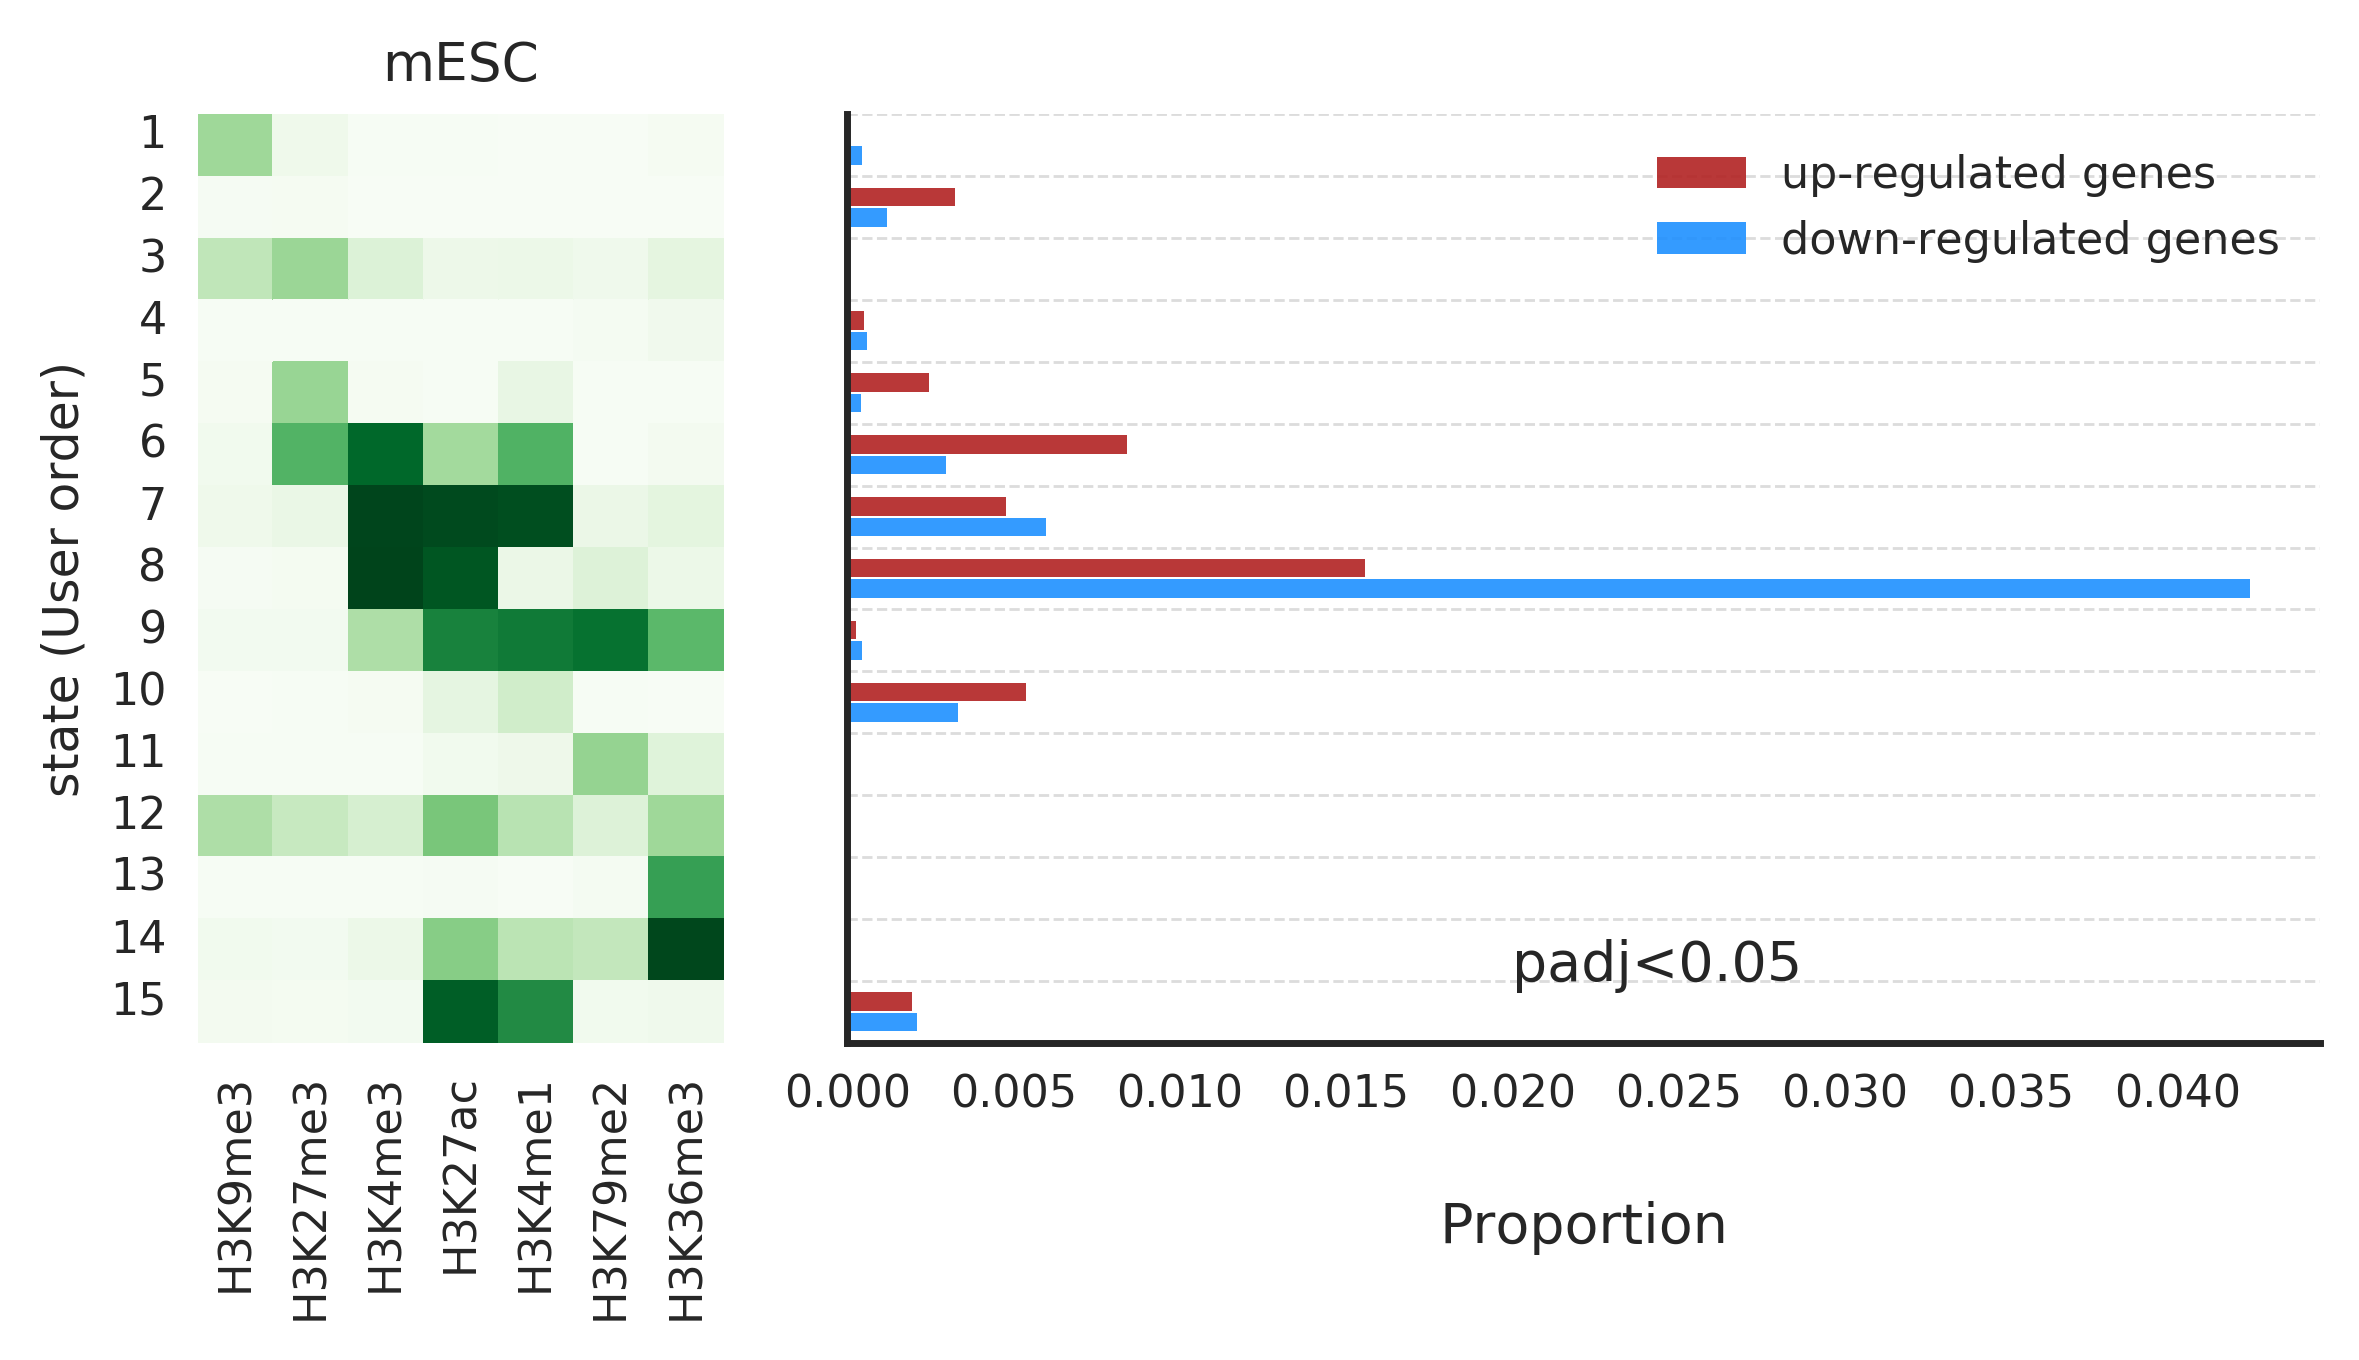

In [57]:
fig, ax = plt.subplots(1,2, dpi=400, sharey=True, figsize=(6,3.5), gridspec_kw = {'width_ratios':[1, 2.8]})
sns.set_style("white")
em = pd.read_csv("../INTERMEDIATE_FILES/Model_15_States_reoredered_mESC/emissions_15.txt",sep="\t",index_col=0)
em = em[list(em)[::-1]]
a = sns.heatmap(em,cmap=cm.Greens, cbar=False, ax = ax[0])
a.tick_params(right=True,  left=False, labelright=False, labelleft=True)
a.set_title("mESC")
a.set_yticks(np.array(range(16)))
a.set_yticklabels(a.get_yticklabels(), rotation = 0, fontsize = 8, va='top')
# ax[0].set_yticklabels([plt.text(,i+0.7,i+1) for i in range(15)], rotation = 0, fontsize = 8, va='top')
ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize = 8)
#sns.set(font_scale=0.5)


#DE GENE RATIO 
fdr=0.05

#back = max_st_3.groupby("TSS").count().col_TSS
#back.loc[back<200] = np.nan
back_up = max_st_2.shape[0]
#max_st_3.loc[(max_st_3.padj<fdr)&(max_st_3.log2FoldChange>0)].shape[0]
back_down = max_st_2.shape[0]
#max_st_3.loc[(max_st_3.padj<fdr)&(max_st_3.log2FoldChange<0)].shape[0]
targ_up = max_st_2.groupby("TSS").count().to_dict()["GeneBody"]
targ_up_ref = max_st_2.loc[(max_st_2.padj<fdr)&(max_st_2.log2FoldChange>0)].groupby("TSS").count().col_TSS.to_dict()
for i in targ_up:
    if i in targ_up_ref:
        targ_up[i] = [targ_up_ref[i]]
    else:
        targ_up[i] = [0]
targ_up = pd.DataFrame(targ_up).T.reindex(["E{}".format(i) for i in range(1,16)])

targ_down = max_st_2.groupby("TSS").count().to_dict()["GeneBody"]
targ_down_ref = max_st_2.loc[(max_st_2.padj<fdr)&(max_st_2.log2FoldChange<0)].groupby("TSS").count().col_TSS.to_dict()
for i in targ_down:
    if i in targ_down_ref:
        targ_down[i] = [targ_down_ref[i]]
    else:
        targ_down[i] = [0]
targ_down = pd.DataFrame(targ_down).T.reindex(["E{}".format(i) for i in range(1,16)])

upp = targ_up/back_up
downn = targ_down/back_down


# upp = upp.reindex(["E{}".format(i) for i in range(16)[1:]])
# downn = downn.reindex(["E{}".format(i) for i in range(16)[1:]])
#print(upp)
ax[1].barh(np.array(range(15))+0.333, upp.values.reshape(-1), height=0.3, alpha=0.9, color='firebrick', label="up-regulated genes")
ax[1].barh(np.array(range(15))+0.666, downn.values.reshape(-1), height=0.3, alpha=0.9, color='dodgerblue', label="down-regulated genes")
ax[1].set_yticks(np.array(range(16)))
ax[1].annotate("padj<{}".format(fdr),(0.02,14))
for i in range(16):
    ax[1].axhline(i, linestyle='--',linewidth=0.5,color='gainsboro')
    
# Hide the right and top spines
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].set_xlabel("\nProportion",size=10)
ax[1].legend(loc=1)

plt.tight_layout()
#ax[0].get_yticklabels()
# upp.values.reshape(-1)
plt.savefig("../FIGURES/Prop_ChromState_TSS_mESC.pdf")